In [1]:
import pandas as pd
#loading the given dataset
df = pd.read_csv("dataset.csv")
#display the first few rows of the dataset
df.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


In [2]:
df


,f1,f2,f3,f4,f5,f6,f7,target
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1
...,...,...,...,...,...,...,...,...
761,9,89,62,0,0,22.5,e,0
762,10,101,76,48,180,d,0.171,0
763,2,122,70,27,b,36.8,0.34,0
764,c,121,72,23,112,26.2,0.245,0


In [3]:
#describing the main statistical features of the dataset
print(df.describe())


               f3      target
count  766.000000  766.000000
mean    69.118799    0.349869
std     19.376901    0.477240
min      0.000000    0.000000
25%     62.500000    0.000000
50%     72.000000    0.000000
75%     80.000000    1.000000
max    122.000000    1.000000


In [4]:
# Use a list to handle invalid characters
invalid_vl = []

# Find non-numerical values in each column of the datset
for i in df.columns:
    # Check for non-numeric values in each column
    non_numeric_values = df[i].apply(lambda x: not str(x).replace('.', '', 1).isdigit())
    
    # If there are non-numeric values, include them in the invalid_entries list
    if non_numeric_values.any():
        invalid_values = df[i][non_numeric_values].unique()
        invalid_vl.extend(invalid_values) #extend is used here to prevent nested listing in the upcoming iterations

#print the invalid entries
print(invalid_vl)

['c', 'f', 'a', 'b', 'd', 'e']


In [5]:
#replacing all the invalid values with NaN
df_c= df.replace(invalid_vl, pd.NA)

df_c= df_c.apply(pd.to_numeric, errors='coerce')
#handling the placed NaNs with the mean of the column
df_i= df_c.fillna(df_c.mean())

df_i.head()

,f1,f2,f3,f4,f5,f6,f7,target
0,6.0,148.0,72,35.0,0.0,33.6,0.627,1
1,1.0,85.0,66,29.0,0.0,26.6,0.351,0
2,8.0,183.0,64,0.0,0.0,23.3,0.672,1
3,1.0,89.0,66,23.0,94.0,28.1,0.167,0
4,0.0,137.0,40,35.0,168.0,43.1,2.288,1


In [6]:
df_i

,f1,f2,f3,f4,f5,f6,f7,target
0,6.000000,148.0,72,35.000000,0.000000,33.60000,0.627000,1
1,1.000000,85.0,66,29.000000,0.000000,26.60000,0.351000,0
2,8.000000,183.0,64,0.000000,0.000000,23.30000,0.672000,1
3,1.000000,89.0,66,23.000000,94.000000,28.10000,0.167000,0
4,0.000000,137.0,40,35.000000,168.000000,43.10000,2.288000,1
...,...,...,...,...,...,...,...,...
761,9.000000,89.0,62,0.000000,0.000000,22.50000,0.472128,0
762,10.000000,101.0,76,48.000000,180.000000,31.99817,0.171000,0
763,2.000000,122.0,70,27.000000,80.091503,36.80000,0.340000,0
764,3.849673,121.0,72,23.000000,112.000000,26.20000,0.245000,0


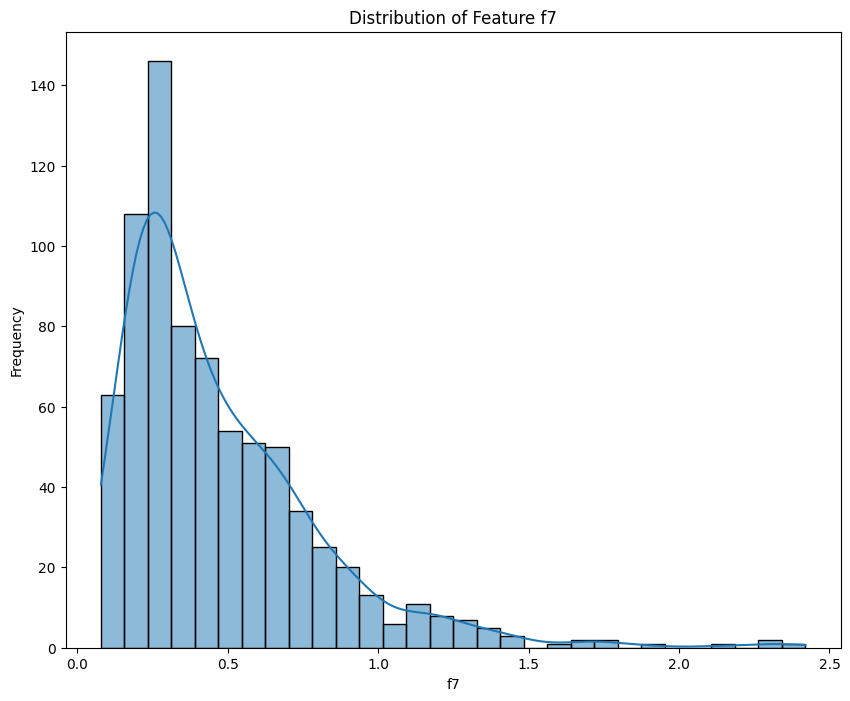

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of feature 'f7'
plt.figure(figsize=(10, 8))
sns.histplot(df_i['f7'], kde=True, bins=30)
plt.title('Distribution of Feature f7')
plt.xlabel('f7')
plt.ylabel('Frequency')
plt.show()


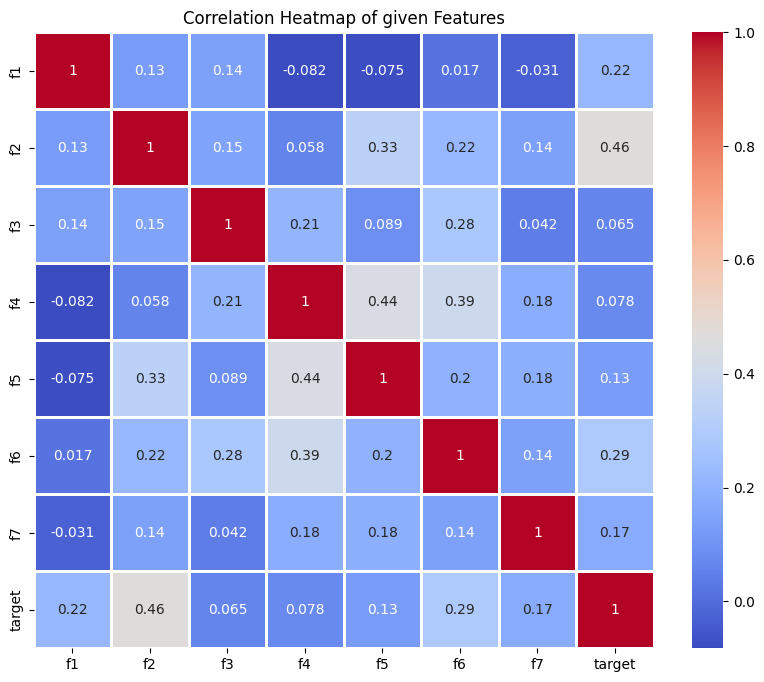

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_i.corr(), annot=True, cmap='coolwarm', linewidths=0.8)
plt.title('Correlation Heatmap of given Features')
plt.show()

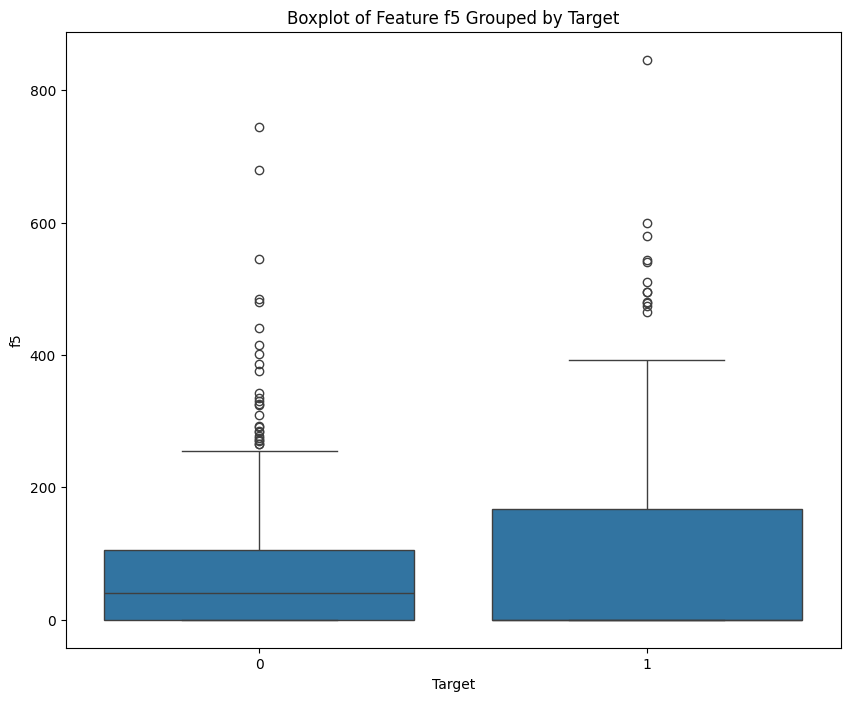

In [9]:
#Boxplot of feature f5 and target
plt.figure(figsize=(10, 8))
sns.boxplot(x='target', y='f5', data=df_i)
plt.title('Boxplot of Feature f5 Grouped by Target')
plt.xlabel('Target')
plt.ylabel('f5')
plt.show()

In [10]:
for i in df_i:
    print("the null values in {0} are {1}".format(i, df_i[i].isnull().sum()))
#no null values are present in our dataset

the null values in f1 are 0
the null values in f2 are 0
the null values in f3 are 0
the null values in f4 are 0
the null values in f5 are 0
the null values in f6 are 0
the null values in f7 are 0
the null values in target are 0


In [11]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      766 non-null    float64
 1   f2      766 non-null    float64
 2   f3      766 non-null    int64  
 3   f4      766 non-null    float64
 4   f5      766 non-null    float64
 5   f6      766 non-null    float64
 6   f7      766 non-null    float64
 7   target  766 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 48.0 KB


In [12]:
from sklearn.preprocessing import StandardScaler

# Splitting the data into input features and target
X = df_i.drop('target', axis=1)
y = df_i['target']

# Initializing the StandardScaler 
scaler = StandardScaler()

# Scale the input features
X_scl = scaler.fit_transform(X)

X_scl_df = pd.DataFrame(X_scl, columns=X.columns)

X_scl_df.head()



,f1,f2,f3,f4,f5,f6,f7
0,0.638214,0.849057,0.148790,0.907015,-0.695096,0.203073,0.467733
1,-0.845779,-1.125480,-0.161060,0.530596,-0.695096,-0.684356,-0.365823
2,1.231811,1.946022,-0.264343,-1.288765,-0.695096,-1.102715,0.603639
3,-0.845779,-1.000113,-0.161060,0.154176,0.120709,-0.494193,-0.921527
4,-1.142577,0.504297,-1.503740,0.907015,0.762938,1.407440,5.484172


In [13]:
#analysing the class distribution of the target variable
class_distribution = y.value_counts(normalize=True)
class_distribution

target
0    0.650131
1    0.349869
Name: proportion, dtype: float64

In [14]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Initializing the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# use oversampling technique to resolve class imbalance in the target column
X_os, y_os = oversampler.fit_resample(X_scl_df, y)

# new class distribution of the target
new_class_distribution = pd.Series(y_os).value_counts(normalize=True)
print(new_class_distribution)


target
1    0.5
0    0.5
Name: proportion, dtype: float64


In [15]:
print(X_os)


           f1        f2        f3        f4        f5        f6        f7
0    0.638214  0.849057  0.148790  0.907015 -0.695096  0.203073  0.467733
1   -0.845779 -1.125480 -0.161060  0.530596 -0.695096 -0.684356 -0.365823
2    1.231811  1.946022 -0.264343 -1.288765 -0.695096 -1.102715  0.603639
3   -0.845779 -1.000113 -0.161060  0.154176  0.120709 -0.494193 -0.921527
4   -1.142577  0.504297 -1.503740  0.907015  0.762938  1.407440  5.484172
..        ...       ...       ...       ...       ...       ...       ...
991  1.528610  1.381869  0.975055 -1.288765 -0.695096 -0.202609 -0.513809
992  0.341415  2.071390  0.355356  0.405122  1.101410  1.470828  1.696927
993 -0.845779  0.034169 -0.264343  0.718805  0.658793  0.393236  0.664042
994 -1.142577  0.316246 -3.569403 -1.288765 -0.695096  1.420118 -0.610453
995  1.231811 -0.028515 -3.569403 -1.288765 -0.695096 -0.253319 -0.873205

[996 rows x 7 columns]


In [16]:
print(y_os)

0      1
1      0
2      1
3      0
4      1
      ..
991    1
992    1
993    1
994    1
995    1
Name: target, Length: 996, dtype: int64


In [17]:
from sklearn.model_selection import train_test_split

#  spliting the data into train and test splits -> 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size=0.2, random_state=42)

# splitting the obtained training data from above again into 80% training and 20% validation
X_train_final, X_valid, y_train_final, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Observing the shapes of all our splits
print(f"Training set of features: {X_train_final.shape}")
print(f"Validation set of features: {X_valid.shape}")
print(f"Test set of features: {X_test.shape}")
print(f"Training set of the target: {y_train_final.shape}")
print(f"Validation set of target: {y_valid.shape}")
print(f"Test set of the target: {y_test.shape}")




Training set of features: (636, 7)
Validation set of features: (160, 7)
Test set of features: (200, 7)
Training set of the target: (636,)
Validation set of target: (160,)
Test set of the target: (200,)


In [18]:
import torch

# Convert the training, validation, and test sets to PyTorch tensors
X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32).unsqueeze(1)

X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Check the shapes of all the tensors
print(f"Training tensor (features) shape: {X_train_tensor.shape}")
print(f"Validation tensor (features) shape: {X_valid_tensor.shape}")
print(f"Test tensor (features) shape: {X_test_tensor.shape}")
print(f"Training tensor (target) shape: {y_train_tensor.shape}")
print(f"Validation tensor (target) shape: {y_valid_tensor.shape}")
print(f"Test tensor (target) shape: {y_test_tensor.shape}")


Training tensor (features) shape: torch.Size([636, 7])
Validation tensor (features) shape: torch.Size([160, 7])
Test tensor (features) shape: torch.Size([200, 7])
Training tensor (target) shape: torch.Size([636, 1])
Validation tensor (target) shape: torch.Size([160, 1])
Test tensor (target) shape: torch.Size([200, 1])


In [19]:

import torch
import torch.nn as nn

#neural network architecture
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        # Input layer to Hidden Layer 1 (7 inputs -> 64 neurons)
        self.fc1 = nn.Linear(7, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        
        # Hidden Layer 1 to Hidden Layer 2 (64 neurons -> 64 neurons)
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        
        # Hidden Layer 2 to Output Layer (64 neurons -> 1 output neuron)
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        # Forward pass through the network
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model
model = NeuralNetwork()

# Print the model summary
print(model)


NeuralNetwork(
  (fc1): Linear(in_features=7, out_features=64, bias=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.5, inplace=False)
  (output): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [20]:
pip install torchinfo


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
from torchinfo import summary

#summary of the model
summary(model, input_size=(1, 7))


Layer (type:depth-idx)                   Output Shape              Param #
NeuralNetwork                            [1, 1]                    --
├─Linear: 1-1                            [1, 64]                   512
├─ReLU: 1-2                              [1, 64]                   --
├─Dropout: 1-3                           [1, 64]                   --
├─Linear: 1-4                            [1, 64]                   4,160
├─ReLU: 1-5                              [1, 64]                   --
├─Dropout: 1-6                           [1, 64]                   --
├─Linear: 1-7                            [1, 1]                    65
├─Sigmoid: 1-8                           [1, 1]                    --
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02

In [21]:

import torch.nn as nn

# Using Binary Cross Entropy Loss function
loss_func = nn.BCELoss()


In [22]:

import torch.optim as optim

# using Adam optimizer with a learning rate (0.001)
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [23]:


from torch.utils.data import DataLoader, TensorDataset

# Create TensorDataset for both training validation  and test tensors
train_tds = TensorDataset(X_train_tensor, y_train_tensor)
valid_tds = TensorDataset(X_valid_tensor, y_valid_tensor)
test_tds=TensorDataset(X_test_tensor, y_test_tensor)

# Creating DataLoaders for the train , valid and test tensor data sets
train_dl = DataLoader(train_tds, batch_size=32, shuffle=True)

valid_dl = DataLoader(valid_tds, batch_size=32, shuffle=False)

test_dl = DataLoader(test_tds, batch_size=32, shuffle=False)

In [24]:

import torch
import torch.nn as nn
import torch.optim as optim
import time
from torch.utils.data import DataLoader, TensorDataset

# Parameters
epochs_n = 10 
batch_size = 32 
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

for epoch in range(epochs_n):
    model.train()  # Training the model
    train_running_loss = 0.0
    correct_train = 0
    total_train = 0

    start_time = time.time()

    for train_inputs, train_labels in train_dl:  # Iterate over batches
        train_inputs, train_labels = train_inputs.float(), train_labels.float().squeeze()
        
        # Forward pass
        train_outputs = model(train_inputs)
        train_outputs = torch.squeeze(train_outputs)  # Squeeze the output to match the labels' shape
        
        # Calculating the training loss
        train_loss = loss_func(train_outputs, train_labels)
        
        # Backpropagation, zero gradients, computing gradients, and updating the weights
        optimizer.zero_grad() 
        train_loss.backward() 
        optimizer.step()  
        
        train_running_loss =train_running_loss+ train_loss.item() * train_inputs.size(0)  # Accumulate loss for the batch
        # Calculating training accuracy
        train_predics = torch.round(train_outputs)
        correct_train = correct_train+ (train_predics == train_labels).sum().item()
        total_train =total_train+ train_labels.size(0)

    # Calculating the average training loss for the epoch
    epoch_train_loss = train_running_loss / len(train_dl.dataset)
    train_losses.append(epoch_train_loss)
    
    train_acc = (correct_train / total_train)*100
    train_accuracies.append(train_acc)

    

    # Validation phase in which there will be no backpropagation
    model.eval()  # Set the model to evaluation mode
    valid_running_loss = 0.0
    correct_valid = 0
    total_valid = 0

    with torch.no_grad():  # Disable gradient computation
        for valid_inputs, valid_labels in valid_dl:
            valid_inputs, valid_labels = valid_inputs.float(), valid_labels.float().squeeze()
            
            # Forward pass through the network
            valid_outputs = model(valid_inputs)
            valid_outputs = torch.squeeze(valid_outputs)  # Squeeze to match the shape of the labels
            valid_loss = loss_func(valid_outputs, valid_labels)

            # Calculating the validation accuracy
            valid_predics = torch.round(valid_outputs)
            correct_valid = correct_valid+ (valid_predics == valid_labels).sum().item()
            total_valid =total_valid+valid_labels.size(0)
            
            valid_running_loss = valid_running_loss +valid_loss.item() * valid_inputs.size(0)

    # Calculating the average validation loss for the epoch
    epoch_valid_loss = valid_running_loss / len(valid_dl.dataset)
    valid_losses.append(epoch_valid_loss)

    valid_acc = (correct_valid / total_valid)*100
    valid_accuracies.append(valid_acc)

    # Estimate the time taken for the epoch
    epoch_time = time.time() - start_time

    print(f"Epoch {epoch+1}/{epochs_n}, "
           f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
           f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {valid_acc:.4f}, "
          f"Time: {epoch_time:.4f}s")


Epoch 1/10, Train Loss: 0.6800, Train Accuracy: 56.1321, Validation Loss: 0.6528, Validation Accuracy: 70.0000, Time: 0.0755s
Epoch 2/10, Train Loss: 0.6530, Train Accuracy: 65.2516, Validation Loss: 0.6163, Validation Accuracy: 72.5000, Time: 0.0497s
Epoch 3/10, Train Loss: 0.6126, Train Accuracy: 68.5535, Validation Loss: 0.5801, Validation Accuracy: 75.0000, Time: 0.0332s
Epoch 4/10, Train Loss: 0.5966, Train Accuracy: 70.7547, Validation Loss: 0.5440, Validation Accuracy: 75.6250, Time: 0.0168s
Epoch 5/10, Train Loss: 0.5686, Train Accuracy: 72.7987, Validation Loss: 0.5156, Validation Accuracy: 74.3750, Time: 0.0313s
Epoch 6/10, Train Loss: 0.5693, Train Accuracy: 70.9119, Validation Loss: 0.5013, Validation Accuracy: 75.0000, Time: 0.0313s
Epoch 7/10, Train Loss: 0.5452, Train Accuracy: 71.6981, Validation Loss: 0.4903, Validation Accuracy: 76.2500, Time: 0.0619s
Epoch 8/10, Train Loss: 0.5330, Train Accuracy: 73.7421, Validation Loss: 0.4832, Validation Accuracy: 76.8750, Time: 

In [25]:
torch.save(model.state_dict(), 'best_model_weights_p1.pth')


In [26]:

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from sklearn.metrics import precision_recall_fscore_support

# evaluating the model
model.eval()  
correct_test = 0  # Initialize to count correct predictions
total_test = 0  # Initialize to count total examples
total_test_loss = 0.0  # Initialize total test loss
test_predictions = []  # Store predicted values
all_labels = []  # Store true labels

with torch.no_grad():  # Disable gradient computation
    for test_inputs, test_labels in test_dl:
        test_inputs, test_labels = test_inputs.float(), test_labels.float().squeeze()  # Ensuring correct data type
        
        # Forward pass
        test_outputs = model(test_inputs)
        test_outputs = torch.squeeze(test_outputs)  # Squeeze to match the labels' shape
        
        # Calculate the loss
        test_loss = loss_func(test_outputs, test_labels)
        total_test_loss += test_loss.item() * test_inputs.size(0)  # Accumulate total test loss
        
        # Calculate test accuracy
        test_predics = torch.round(test_outputs)  # Round sigmoid outputs to 0 or 1
        correct_test += (test_predics == test_labels).sum().item()  # Counting correct predictions
        total_test += test_labels.size(0)  # Count total test examples

        # Store all predictions and true labels for measuring precision, recall, F1
        test_predictions.extend(test_predics.cpu().numpy())  # Collect predictions
        all_labels.extend(test_labels.cpu().numpy())  # Collect true labels

# Calculating  the average test loss
average_test_loss = total_test_loss / total_test

# Calculating the test accuracy 
test_accuracy = (correct_test / total_test)*100
print(f"Test Accuracy in %: {test_accuracy:.4f}%")

# Calculate precision, recall, and F1 score using sklearn
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, test_predictions, average='binary')

# Print precision, recall, and F1 score
print(f"Precision in %: {precision * 100:.4f}%")
print(f"Recall in %: {recall * 100:.4f}%")
print(f"F1 Score in %: {f1 * 100:.4f}%")


Test Accuracy in %: 78.5000%
Precision in %: 76.7677%
Recall in %: 79.1667%
F1 Score in %: 77.9487%


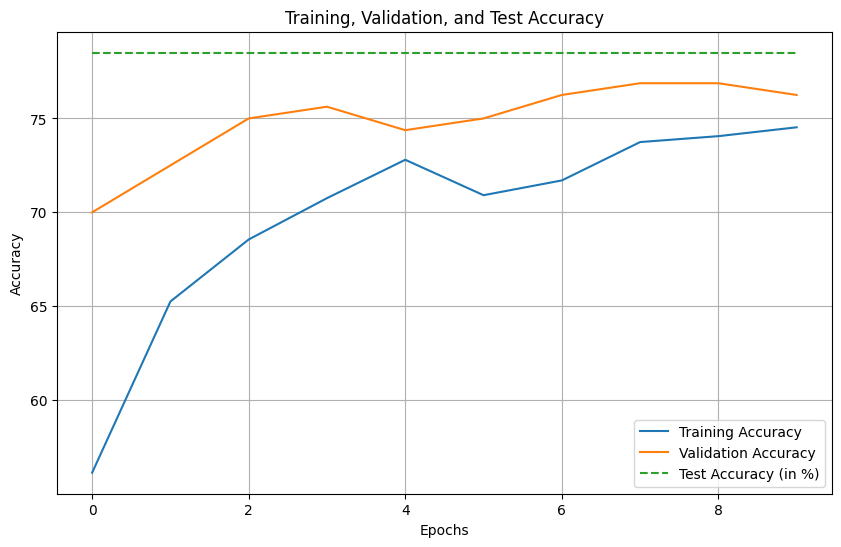

In [27]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies = [test_accuracy] * epochs_n # Repeat test accuracy

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy (in %)', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


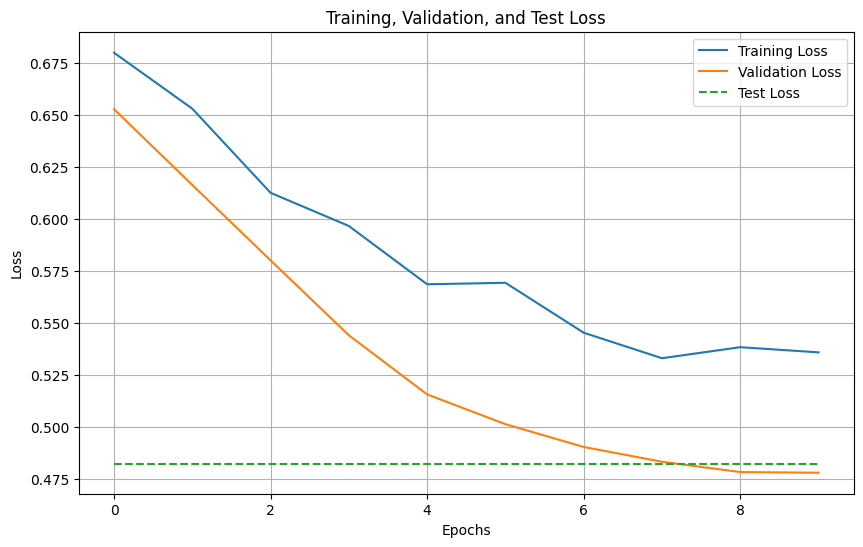

In [28]:

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')

test_losses = [average_test_loss] * epochs_n
plt.plot(test_losses, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


Confusion Matrix:


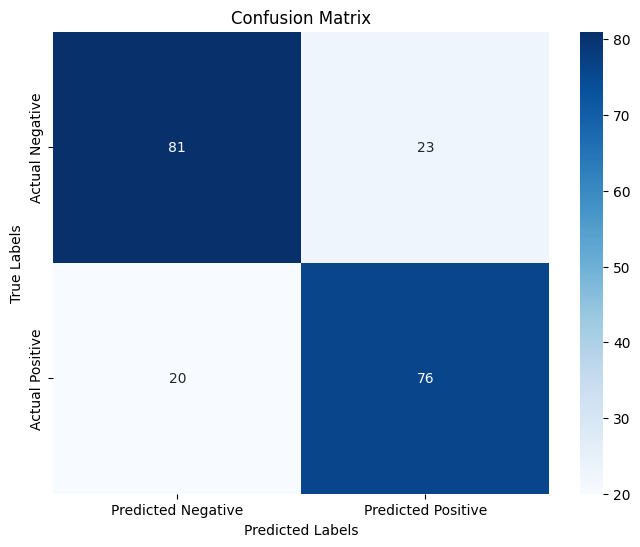

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
c_mx = confusion_matrix(all_labels, test_predictions)
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(c_mx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


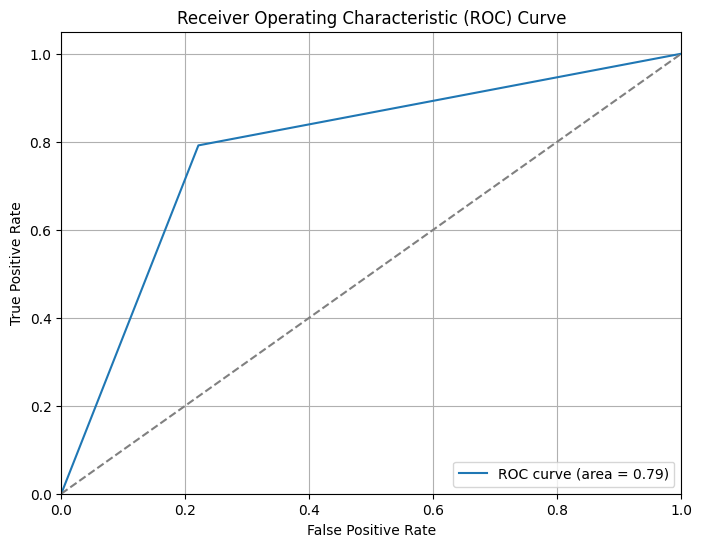

In [30]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(all_labels,test_predictions)  # Use raw outputs before rounding for ROC
roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [51]:
#Part 2

In [31]:
import torch
import torch.nn as nn

class NeuralNetworkSetup(nn.Module):
    def __init__(self, dropout_rate=0.4):
        super(NeuralNetworkSetup, self).__init__()
        
        # Input layer to Hidden Layer 1 (7 inputs and 64 neurons)
        self.fc1 = nn.Linear(7, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 1 to Hidden Layer 2 (64 neurons and 64 neurons)
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 2 to Output Layer (64 neurons and 1 output neuron)
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through the network
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the models with dropout rate of 0.3,0.5,and 0.7 and remaining parameters like optimizer, no.of hidden layers and batch size are same
model_s1 = NeuralNetworkSetup(dropout_rate=0.3)
model_s2 = NeuralNetworkSetup(dropout_rate=0.5)
model_s3 = NeuralNetworkSetup(dropout_rate=0.7)

In [32]:
# Define the function to train and validate the model
def train_and_validate(model, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n, batch_size):
    X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32).unsqueeze(1)

    X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
    y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1)

    loss_func = nn.BCELoss()
    learning_rate = 0.001
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_tds = TensorDataset(X_train_tensor, y_train_tensor)
    valid_tds = TensorDataset(X_valid_tensor, y_valid_tensor)

    # Creating DataLoader for the training and validation sets
    train_dl = DataLoader(train_tds, batch_size, shuffle=True)
    valid_dl = DataLoader(valid_tds, batch_size, shuffle=False)

    # Lists to store losses and accuracies
    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    # Ensure epochs_n is set correctly
    print(f"Running for {epochs_n} epochs")

    # Training and validation loop
    for epoch in range(epochs_n):
        print(f"Starting epoch {epoch + 1}/{epochs_n}")  # Debugging print statement

        model.train()  # Set the model to training mode
        train_running_loss = 0.0
        correct_train = 0
        total_train = 0

        start_time = time.time()

        # Training loop over batches
        for train_inputs, train_labels in train_dl:
            train_inputs, train_labels = train_inputs.float(), train_labels.float().squeeze()

            # Forward pass
            train_outputs = model(train_inputs)
            train_outputs = torch.squeeze(train_outputs)  # Ensure outputs match the shape of labels

            # Compute the loss
            train_loss = loss_func(train_outputs, train_labels)

            # Backpropagation: zero gradients, compute gradients, and update weights
            optimizer.zero_grad()  
            train_loss.backward() 
            optimizer.step()  

            # Accumulate loss and accuracy
            train_running_loss += train_loss.item() * train_inputs.size(0)
            train_predics = torch.round(train_outputs)
            correct_train += (train_predics == train_labels).sum().item()
            total_train += train_labels.size(0)

        # Compute average training loss and accuracy for the epoch
        epoch_train_loss = train_running_loss / len(train_dl.dataset)
        train_losses.append(epoch_train_loss)

        train_acc = (correct_train / total_train) * 100
        train_accuracies.append(train_acc)

        # Validation phase (no backpropagation)
        model.eval()  # Set the model to evaluation mode
        valid_running_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():  # Disable gradient computation
            for valid_inputs, valid_labels in valid_dl:
                valid_inputs, valid_labels = valid_inputs.float(), valid_labels.float().squeeze()

                # Forward pass through the network
                valid_outputs = model(valid_inputs)
                valid_outputs = torch.squeeze(valid_outputs)  # Squeeze to match the labels' shape

                # Compute the validation loss
                valid_loss = loss_func(valid_outputs, valid_labels)

                # Calculate validation accuracy
                valid_predics = torch.round(valid_outputs)
                correct_valid += (valid_predics == valid_labels).sum().item()
                total_valid += valid_labels.size(0)

                # Accumulate validation loss
                valid_running_loss += valid_loss.item() * valid_inputs.size(0)

        # Compute average validation loss and accuracy for the epoch
        epoch_valid_loss = valid_running_loss / len(valid_dl.dataset)
        valid_losses.append(epoch_valid_loss)

        valid_acc = (correct_valid / total_valid) * 100
        valid_accuracies.append(valid_acc)

        # Estimate the time taken for the epoch
        epoch_time = time.time() - start_time

        # Print epoch summary
        print(f"Epoch {epoch + 1}/{epochs_n}, "
              f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {valid_acc:.4f}, "
              f"Time: {epoch_time:.4f}s")

    return train_losses, valid_losses, train_accuracies, valid_accuracies


In [33]:

train_losses_model_s1, valid_losses_model_s1, train_accuracies_model_s1, valid_accuracies_model_s1=train_and_validate(model_s1, X_train_final, y_train_final,X_valid,y_valid,X_test,y_test,epochs_n=10,batch_size=32)


Running for 10 epochs
Starting epoch 1/10
Epoch 1/10, Train Loss: 0.6714, Train Accuracy: 58.4906, Validation Loss: 0.6394, Validation Accuracy: 66.2500, Time: 0.0886s
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.6294, Train Accuracy: 69.3396, Validation Loss: 0.5822, Validation Accuracy: 75.0000, Time: 0.0483s
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.5882, Train Accuracy: 73.4277, Validation Loss: 0.5384, Validation Accuracy: 75.6250, Time: 0.0340s
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.5670, Train Accuracy: 73.8994, Validation Loss: 0.5089, Validation Accuracy: 74.3750, Time: 0.0423s
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.5413, Train Accuracy: 72.0126, Validation Loss: 0.4931, Validation Accuracy: 75.0000, Time: 0.0433s
Starting epoch 6/10
Epoch 6/10, Train Loss: 0.5352, Train Accuracy: 74.8428, Validation Loss: 0.4847, Validation Accuracy: 75.0000, Time: 0.0307s
Starting epoch 7/10
Epoch 7/10, Train Loss: 0.5574, Train Accuracy: 71.6981, Validation Loss: 0.4839, 

In [34]:
train_losses_model_s2, valid_losses_model_s2, train_accuracies_model_s2, valid_accuracies_model_s2=train_and_validate(model_s2, X_train_final, y_train_final,X_valid,y_valid,X_test,y_test,epochs_n=10, batch_size=32)

Running for 10 epochs
Starting epoch 1/10
Epoch 1/10, Train Loss: 0.6877, Train Accuracy: 52.0440, Validation Loss: 0.6583, Validation Accuracy: 70.6250, Time: 0.0673s
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.6528, Train Accuracy: 65.2516, Validation Loss: 0.6222, Validation Accuracy: 73.7500, Time: 0.0523s
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.6262, Train Accuracy: 68.2390, Validation Loss: 0.5871, Validation Accuracy: 73.7500, Time: 0.0302s
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.5917, Train Accuracy: 71.5409, Validation Loss: 0.5548, Validation Accuracy: 73.7500, Time: 0.0311s
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.5762, Train Accuracy: 71.5409, Validation Loss: 0.5281, Validation Accuracy: 75.0000, Time: 0.0361s
Starting epoch 6/10
Epoch 6/10, Train Loss: 0.5742, Train Accuracy: 69.6541, Validation Loss: 0.5119, Validation Accuracy: 73.7500, Time: 0.0565s
Starting epoch 7/10
Epoch 7/10, Train Loss: 0.5452, Train Accuracy: 73.5849, Validation Loss: 0.4993, 

In [35]:
train_losses_model_s3, valid_losses_model_s3, train_accuracies_model_s3, valid_accuracies_model_s3=train_and_validate(model_s3, X_train_final, y_train_final,X_valid,y_valid,X_test,y_test,epochs_n=10, batch_size=32)

Running for 10 epochs
Starting epoch 1/10
Epoch 1/10, Train Loss: 0.6784, Train Accuracy: 58.3333, Validation Loss: 0.6521, Validation Accuracy: 67.5000, Time: 0.0641s
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.6727, Train Accuracy: 56.1321, Validation Loss: 0.6320, Validation Accuracy: 71.8750, Time: 0.0624s
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.6483, Train Accuracy: 62.4214, Validation Loss: 0.6113, Validation Accuracy: 76.2500, Time: 0.0482s
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.6272, Train Accuracy: 66.0377, Validation Loss: 0.5884, Validation Accuracy: 77.5000, Time: 0.0304s
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.6127, Train Accuracy: 68.5535, Validation Loss: 0.5636, Validation Accuracy: 78.7500, Time: 0.0438s
Starting epoch 6/10
Epoch 6/10, Train Loss: 0.5801, Train Accuracy: 70.9119, Validation Loss: 0.5431, Validation Accuracy: 78.1250, Time: 0.0417s
Starting epoch 7/10
Epoch 7/10, Train Loss: 0.6017, Train Accuracy: 68.0818, Validation Loss: 0.5287, 

In [36]:
from sklearn.metrics import accuracy_score

def evaluate_test_accuracy(model, X_test, y_test,batch_size):
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    test_tds=TensorDataset(X_test_tensor, y_test_tensor)
    
    test_dl = DataLoader(test_tds, batch_size=batch_size, shuffle=False)
    
    model.eval()  
    correct_test = 0  # Initialize to count correct predictions
    total_test = 0  # Initialize to count total examples
    total_test_loss = 0.0  # Initialize total test loss
    test_predictions = []  # Store predicted values
    all_labels = []  # Store true labels
    
    with torch.no_grad():  # Disable gradient computation
        for test_inputs, test_labels in test_dl:
            test_inputs, test_labels = test_inputs.float(), test_labels.float().squeeze()  # Ensure correct data type
            
            # Forward pass
            test_outputs = model(test_inputs)
            test_outputs = torch.squeeze(test_outputs)  # Squeeze to match the labels' shape
            
            # Calculate the loss
            test_loss = loss_func(test_outputs, test_labels)
            total_test_loss += test_loss.item() * test_inputs.size(0)  # Accumulate total test loss
            
            # Calculate test accuracy
            test_predics = torch.round(test_outputs)  # Round sigmoid outputs to 0 or 1
            correct_test += (test_predics == test_labels).sum().item()  # Count correct predictions
            total_test += test_labels.size(0)  # Count total test examples
    
            # Storing all predictions and true labels for measuring precision, recall, F1
            test_predictions.extend(test_predics.cpu().numpy())  # Collect predictions
            all_labels.extend(test_labels.cpu().numpy())  # Collect true labels
    
    # Calculate the average test loss
    average_test_loss = total_test_loss / total_test
    
    # Calculate test accuracy as a percentage
    test_accuracy = (correct_test / total_test)*100
    print(f"test accuracy in % is {test_accuracy:4f}")
    return average_test_loss,test_accuracy


In [37]:
avg_test_loss_model_s1,test_accuracy_model_s1 = evaluate_test_accuracy(model_s1, X_test, y_test,batch_size=32)
avg_test_loss_model_s2,test_accuracy_model_s2 = evaluate_test_accuracy(model_s2, X_test, y_test,batch_size=32)
avg_test_loss_model_s3,test_accuracy_model_s3 = evaluate_test_accuracy(model_s3, X_test, y_test,batch_size=32)


test accuracy in % is 79.000000
test accuracy in % is 76.500000
test accuracy in % is 79.500000


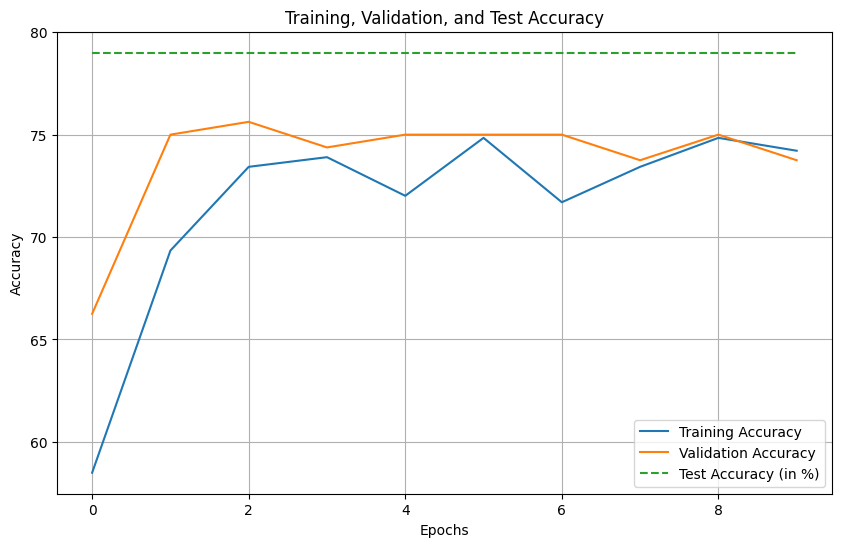

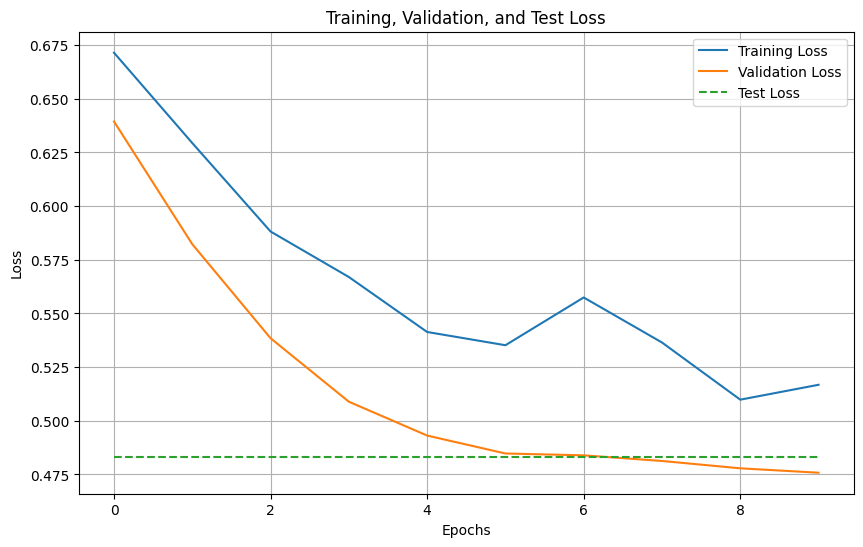

In [38]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies_model_s1 = [test_accuracy_model_s1] * epochs_n # 10 is our epoch count

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_model_s1, label='Training Accuracy')
plt.plot(valid_accuracies_model_s1, label='Validation Accuracy')
plt.plot(test_accuracies_model_s1, label='Test Accuracy (in %)', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_model_s1, label='Training Loss')
plt.plot(valid_losses_model_s1, label='Validation Loss')

test_losses_model_s1 = [avg_test_loss_model_s1] * epochs_n
plt.plot(test_losses_model_s1, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

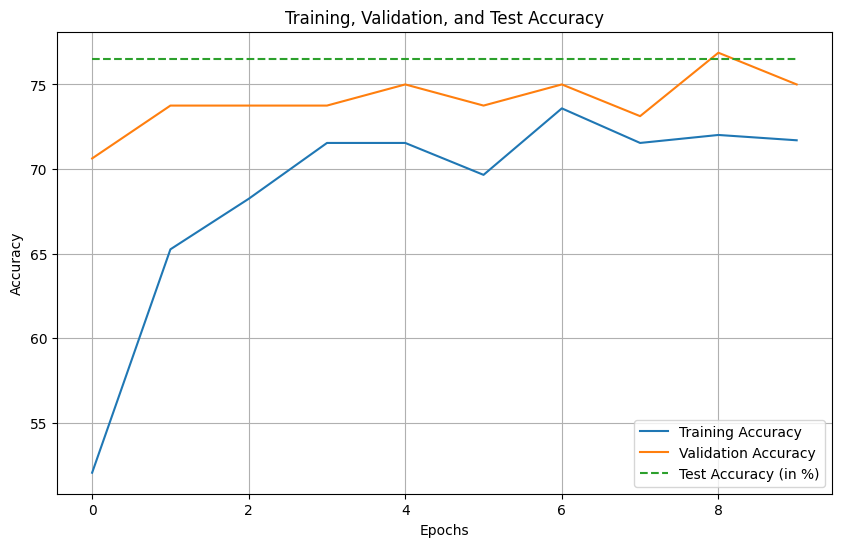

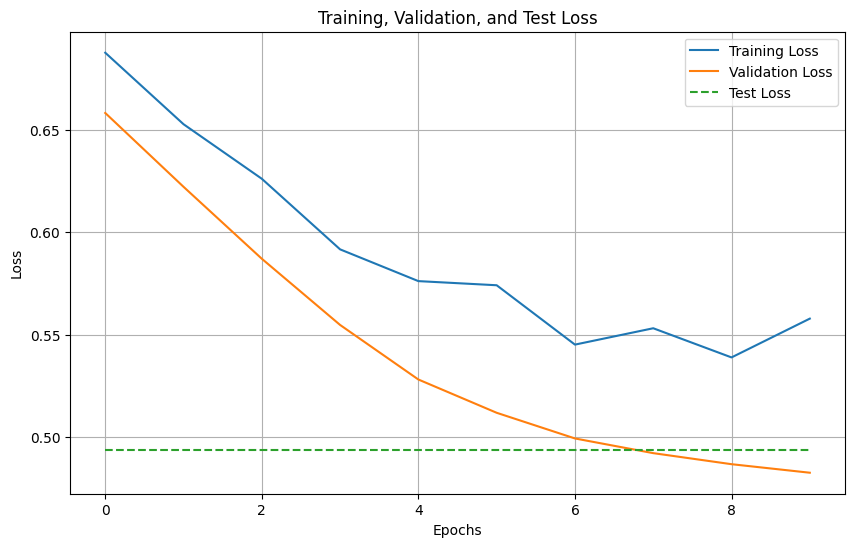

In [42]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies_model_s2 = [test_accuracy_model_s2] * epochs_n # 10 is our epoch count

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_model_s2, label='Training Accuracy')
plt.plot(valid_accuracies_model_s2, label='Validation Accuracy')
plt.plot(test_accuracies_model_s2, label='Test Accuracy (in %)', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_model_s2, label='Training Loss')
plt.plot(valid_losses_model_s2, label='Validation Loss')

test_losses_model_s2 = [avg_test_loss_model_s2] * epochs_n
plt.plot(test_losses_model_s2, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

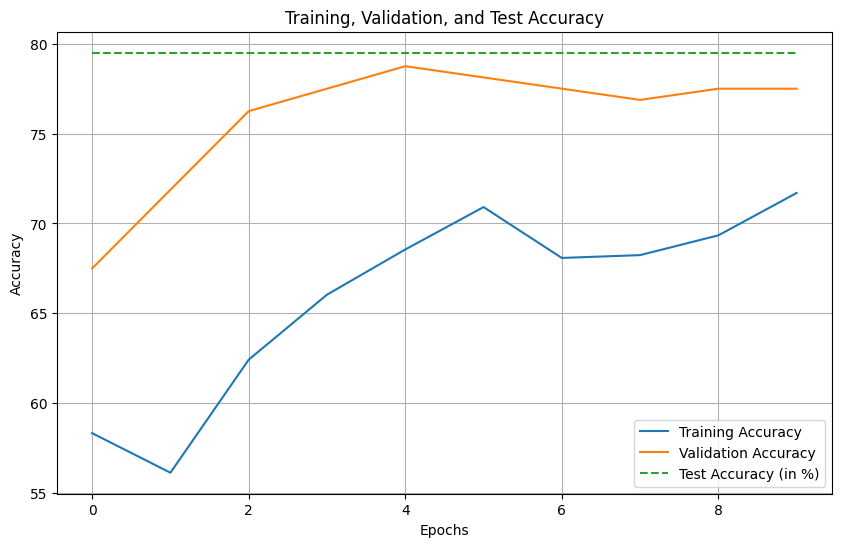

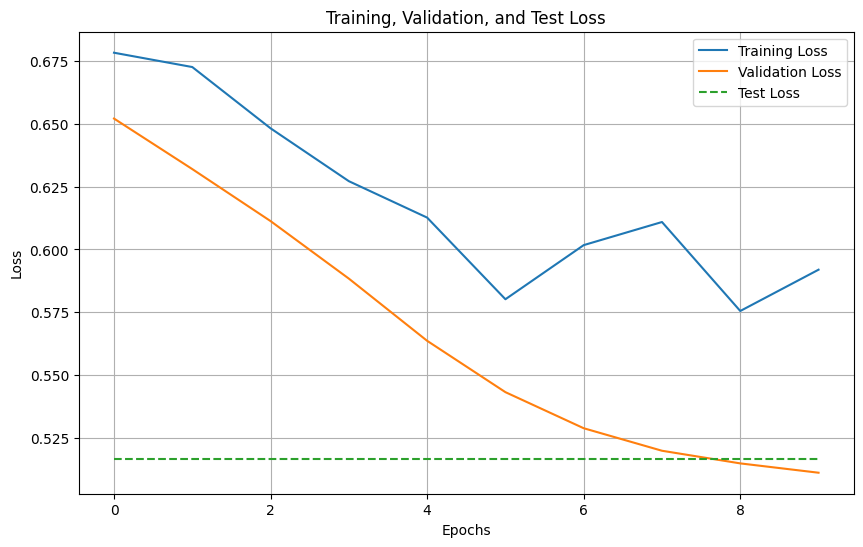

In [43]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies_model_s3 = [test_accuracy_model_s3] * epochs_n # 10 is our epoch count

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_model_s3, label='Training Accuracy')
plt.plot(valid_accuracies_model_s3, label='Validation Accuracy')
plt.plot(test_accuracies_model_s3, label='Test Accuracy (in %)', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_model_s3, label='Training Loss')
plt.plot(valid_losses_model_s3, label='Validation Loss')

test_losses_model_s3 = [avg_test_loss_model_s3] * epochs_n
plt.plot(test_losses_model_s3, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
#NN with dropout rate=0.3, 3 hidden layers, RELU as activation function
import torch.nn as nn

class NeuralNetworkExtraHiddenLayer(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(NeuralNetworkExtraHiddenLayer, self).__init__()
        
        # Input layer to Hidden Layer 1 (7 inputs and 64 neurons)
        self.fc1 = nn.Linear(7, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 1 to Hidden Layer 2 (64 neurons and 64 neurons)
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Additional Hidden Layer 2 to Hidden Layer 3 (64 neurons and 64 neurons)
        self.fc3 = nn.Linear(64, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 3 to Output Layer (64 neurons and 1 output neuron)
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through the network with 3 hidden layers
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model with extra layer (3 hidden layers)
model_ehl = NeuralNetworkExtraHiddenLayer(dropout_rate=0.3)



In [40]:
#training the model_ehl
train_losses_model_ehl, valid_losses_model_ehl, train_accuracies_model_ehl, valid_accuracies_model_ehl=train_and_validate(model_ehl, X_train_final, y_train_final,X_valid,y_valid,X_test,y_test,epochs_n=10, batch_size=32)

Running for 10 epochs
Starting epoch 1/10
Epoch 1/10, Train Loss: 0.6828, Train Accuracy: 62.8931, Validation Loss: 0.6653, Validation Accuracy: 72.5000, Time: 0.0749s
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.6502, Train Accuracy: 70.9119, Validation Loss: 0.6143, Validation Accuracy: 70.6250, Time: 0.0527s
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.5988, Train Accuracy: 72.1698, Validation Loss: 0.5484, Validation Accuracy: 73.7500, Time: 0.0452s
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.5613, Train Accuracy: 71.0692, Validation Loss: 0.5020, Validation Accuracy: 73.1250, Time: 0.0569s
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.5518, Train Accuracy: 71.3836, Validation Loss: 0.4879, Validation Accuracy: 76.2500, Time: 0.0476s
Starting epoch 6/10
Epoch 6/10, Train Loss: 0.5399, Train Accuracy: 73.4277, Validation Loss: 0.4865, Validation Accuracy: 75.6250, Time: 0.0420s
Starting epoch 7/10
Epoch 7/10, Train Loss: 0.5210, Train Accuracy: 74.0566, Validation Loss: 0.4803, 

In [41]:
#test accuracy of model_ehl
avg_test_loss_model_ehl,test_accuracy_model_ehl= evaluate_test_accuracy(model_ehl, X_test, y_test,batch_size=32)

test accuracy in % is 73.000000


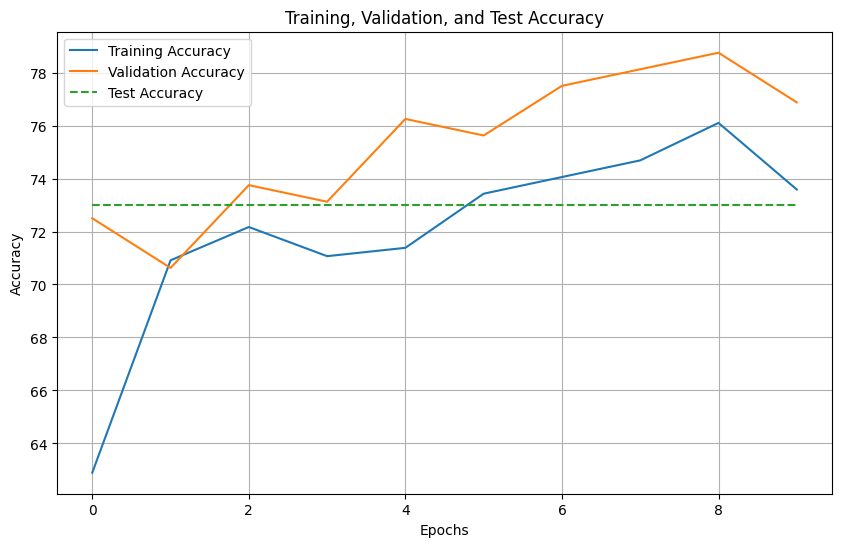

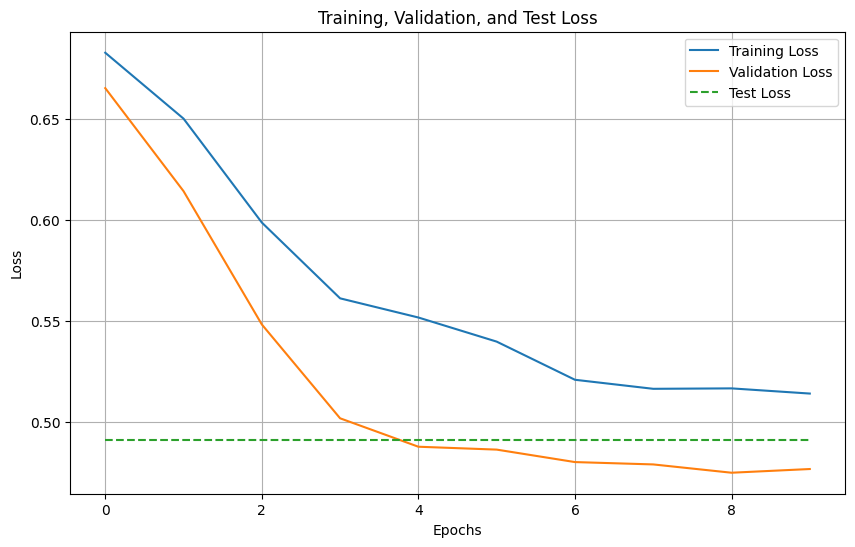

In [44]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies_model_ehl = [test_accuracy_model_ehl] * epochs_n # 10 is our epoch count

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_model_ehl, label='Training Accuracy')
plt.plot(valid_accuracies_model_ehl, label='Validation Accuracy')
plt.plot(test_accuracies_model_ehl, label='Test Accuracy', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_model_ehl, label='Training Loss')
plt.plot(valid_losses_model_ehl, label='Validation Loss')

test_losses_model_ehl = [avg_test_loss_model_ehl] * epochs_n
plt.plot(test_losses_model_ehl, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
#NN with dropout rate=0.3, 4 hidden layers, RELU as activation function
import torch.nn as nn

class NeuralNetworkExtraHiddenLayer1(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(NeuralNetworkExtraHiddenLayer1, self).__init__()
        
        # Input layer to Hidden Layer 1 (7 inputs and 64 neurons)
        self.fc1 = nn.Linear(7, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 1 to Hidden Layer 2 (64 neurons and 64 neurons)
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Additional Hidden Layer 2 to Hidden Layer 3 (64 neurons and 64 neurons)
        self.fc3 = nn.Linear(64, 64)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_rate)

        # Additional Hidden Layer 3 to Hidden Layer 4 (64 neurons and 64 neurons)
        self.fc4 = nn.Linear(64, 64)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 4 to Output Layer (64 neurons and 1 output neuron)
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass through the network with 3 hidden layers
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.relu4(x)
        x = self.dropout4(x)
        
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model with extra layer (3 hidden layers)
model_ehl1= NeuralNetworkExtraHiddenLayer1(dropout_rate=0.3)



In [46]:
#training the model_ehl
train_losses_model_ehl1, valid_losses_model_ehl1, train_accuracies_model_ehl1, valid_accuracies_model_ehl1=train_and_validate(model_ehl1, X_train_final, y_train_final,X_valid,y_valid,X_test,y_test,epochs_n=10, batch_size=32)

Running for 10 epochs
Starting epoch 1/10
Epoch 1/10, Train Loss: 0.6922, Train Accuracy: 50.7862, Validation Loss: 0.6852, Validation Accuracy: 49.3750, Time: 0.1015s
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.6741, Train Accuracy: 51.7296, Validation Loss: 0.6440, Validation Accuracy: 62.5000, Time: 0.0493s
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.6269, Train Accuracy: 63.9937, Validation Loss: 0.5636, Validation Accuracy: 75.6250, Time: 0.0469s
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.5704, Train Accuracy: 72.1698, Validation Loss: 0.4865, Validation Accuracy: 78.7500, Time: 0.0790s
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.5595, Train Accuracy: 73.5849, Validation Loss: 0.4751, Validation Accuracy: 79.3750, Time: 0.0508s
Starting epoch 6/10
Epoch 6/10, Train Loss: 0.5478, Train Accuracy: 73.2704, Validation Loss: 0.4838, Validation Accuracy: 77.5000, Time: 0.0545s
Starting epoch 7/10
Epoch 7/10, Train Loss: 0.5518, Train Accuracy: 73.2704, Validation Loss: 0.4879, 

In [47]:
#test accuracy of model_ehl1
avg_test_loss_model_ehl1,test_accuracy_model_ehl1= evaluate_test_accuracy(model_ehl1, X_test, y_test,batch_size=32)

test accuracy in % is 74.500000


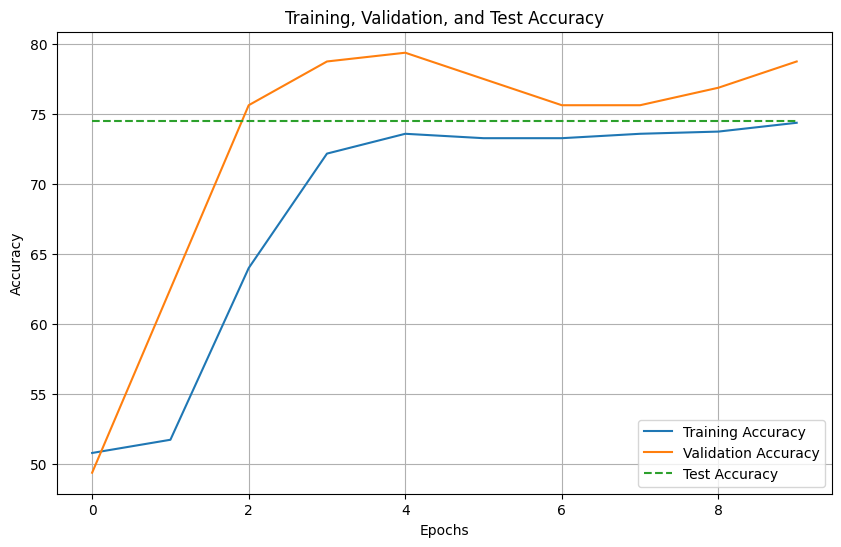

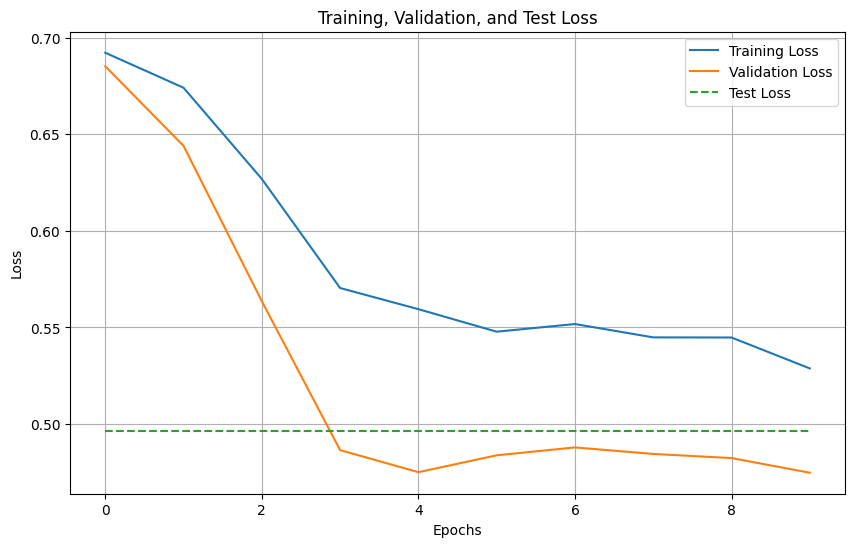

In [48]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies_model_ehl1 = [test_accuracy_model_ehl1] * epochs_n # 10 is our epoch count

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_model_ehl1, label='Training Accuracy')
plt.plot(valid_accuracies_model_ehl1, label='Validation Accuracy')
plt.plot(test_accuracies_model_ehl1, label='Test Accuracy', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_model_ehl1, label='Training Loss')
plt.plot(valid_losses_model_ehl1, label='Validation Loss')

test_losses_model_ehl1 = [avg_test_loss_model_ehl1] * epochs_n
plt.plot(test_losses_model_ehl1, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
import torch
import torch.nn as nn

# Define the neural network with 0.3 dropoutrate,ELU activation and 2 hidden layers
class NeuralNetworkELU(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(NeuralNetworkELU, self).__init__()
        
        # Input layer to Hidden Layer 1 (7 inputs -> 64 neurons)
        self.fc1 = nn.Linear(7, 64)
        self.elu1 = nn.ELU()
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 1 to Hidden Layer 2 (64 neurons -> 64 neurons)
        self.fc2 = nn.Linear(64, 64)
        self.elu2 = nn.ELU()
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 3 to Output Layer (64 neurons -> 1 output neuron)
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass with ELU activation
        x = self.fc1(x)
        x = self.elu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.elu2(x)
        x = self.dropout2(x)
        
        
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model with ELU activation
model_elu = NeuralNetworkELU(dropout_rate=0.3)


In [50]:
train_losses_model_elu, valid_losses_model_elu, train_accuracies_model_elu, valid_accuracies_model_elu=train_and_validate( model_elu, X_train_final, y_train_final,X_valid,y_valid,X_test,y_test,epochs_n=10, batch_size=32)

Running for 10 epochs
Starting epoch 1/10
Epoch 1/10, Train Loss: 0.6282, Train Accuracy: 65.5660, Validation Loss: 0.5664, Validation Accuracy: 73.7500, Time: 0.0643s
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.5702, Train Accuracy: 72.1698, Validation Loss: 0.5092, Validation Accuracy: 76.2500, Time: 0.0619s
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.5424, Train Accuracy: 72.6415, Validation Loss: 0.4908, Validation Accuracy: 75.0000, Time: 0.0363s
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.5315, Train Accuracy: 72.4843, Validation Loss: 0.4829, Validation Accuracy: 75.0000, Time: 0.0468s
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.5402, Train Accuracy: 71.8553, Validation Loss: 0.4819, Validation Accuracy: 75.0000, Time: 0.0596s
Starting epoch 6/10
Epoch 6/10, Train Loss: 0.5343, Train Accuracy: 74.0566, Validation Loss: 0.4815, Validation Accuracy: 76.2500, Time: 0.0401s
Starting epoch 7/10
Epoch 7/10, Train Loss: 0.5232, Train Accuracy: 73.1132, Validation Loss: 0.4797, 

In [51]:
avg_test_loss_model_elu,test_accuracy_model_elu= evaluate_test_accuracy(model_elu, X_test, y_test,batch_size=32)

test accuracy in % is 80.500000


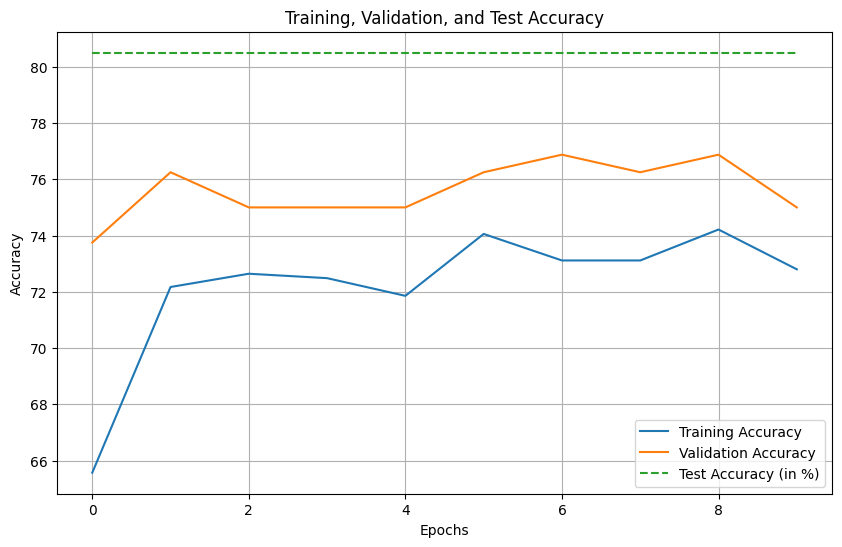

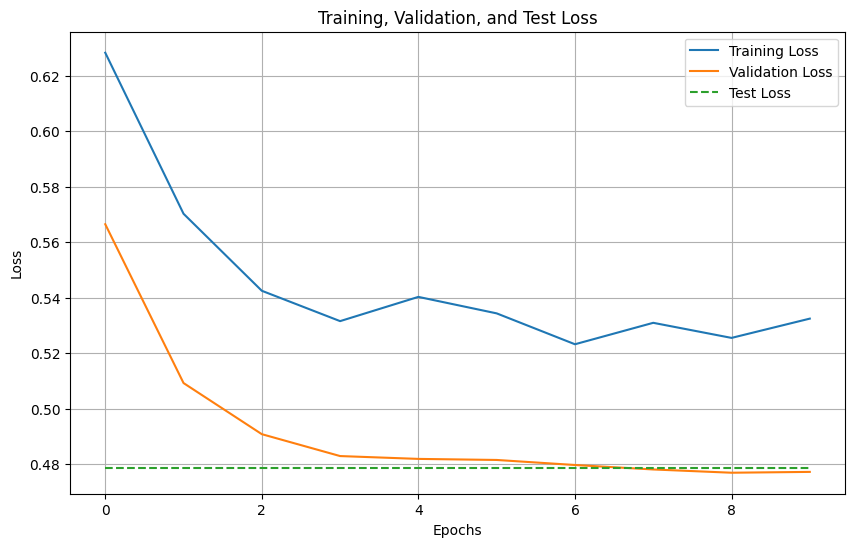

In [52]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies_model_elu = [test_accuracy_model_elu] * epochs_n # 10 is our epoch count

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_model_elu, label='Training Accuracy')
plt.plot(valid_accuracies_model_elu, label='Validation Accuracy')
plt.plot(test_accuracies_model_elu, label='Test Accuracy (in %)', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_model_elu, label='Training Loss')
plt.plot(valid_losses_model_elu, label='Validation Loss')

test_losses_model_elu = [avg_test_loss_model_elu] * epochs_n
plt.plot(test_losses_model_elu, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [53]:
class NeuralNetworkLeakyReLU(nn.Module):
    def __init__(self, dropout_rate=0.3, negative_slope=0.01):
        super(NeuralNetworkLeakyReLU, self).__init__()
        
        # Input layer to Hidden Layer 1 (7 inputs -> 64 neurons)
        self.fc1 = nn.Linear(7, 64)
        self.leaky_relu1 = nn.LeakyReLU(negative_slope=negative_slope)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 1 to Hidden Layer 2 (64 neurons -> 64 neurons)
        self.fc2 = nn.Linear(64, 64)
        self.leaky_relu2 = nn.LeakyReLU(negative_slope=negative_slope)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Hidden Layer 3 to Output Layer (64 neurons -> 1 output neuron)
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Forward pass with Leaky ReLU activation
        x = self.fc1(x)
        x = self.leaky_relu1(x)
        x = self.dropout1(x)
        
        x = self.fc2(x)
        x = self.leaky_relu2(x)
        x = self.dropout2(x)
        
        x = self.output(x)
        x = self.sigmoid(x)
        return x

# Instantiate the model with Leaky ReLU activation
model_leaky_relu = NeuralNetworkLeakyReLU(dropout_rate=0.3, negative_slope=0.01)


In [54]:
train_losses_model_leaky_relu, valid_losses_model_leaky_relu, train_accuracies_model_leaky_relu, valid_accuracies_model_leaky_relu=train_and_validate( model_leaky_relu, X_train_final, y_train_final,X_valid,y_valid,X_test,y_test,epochs_n=10, batch_size=32)

Running for 10 epochs
Starting epoch 1/10
Epoch 1/10, Train Loss: 0.6844, Train Accuracy: 51.5723, Validation Loss: 0.6589, Validation Accuracy: 59.3750, Time: 0.0680s
Starting epoch 2/10
Epoch 2/10, Train Loss: 0.6455, Train Accuracy: 64.7799, Validation Loss: 0.6095, Validation Accuracy: 72.5000, Time: 0.0599s
Starting epoch 3/10
Epoch 3/10, Train Loss: 0.6044, Train Accuracy: 70.2830, Validation Loss: 0.5634, Validation Accuracy: 73.7500, Time: 0.0310s
Starting epoch 4/10
Epoch 4/10, Train Loss: 0.5765, Train Accuracy: 70.4403, Validation Loss: 0.5255, Validation Accuracy: 73.7500, Time: 0.0434s
Starting epoch 5/10
Epoch 5/10, Train Loss: 0.5472, Train Accuracy: 71.8553, Validation Loss: 0.5019, Validation Accuracy: 73.7500, Time: 0.0569s
Starting epoch 6/10
Epoch 6/10, Train Loss: 0.5407, Train Accuracy: 73.2704, Validation Loss: 0.4940, Validation Accuracy: 74.3750, Time: 0.0360s
Starting epoch 7/10
Epoch 7/10, Train Loss: 0.5354, Train Accuracy: 73.5849, Validation Loss: 0.4883, 

In [55]:
avg_test_loss_model_leaky_relu,test_accuracy_model_leaky_relu= evaluate_test_accuracy(model_leaky_relu, X_test, y_test,batch_size=32)

test accuracy in % is 78.500000


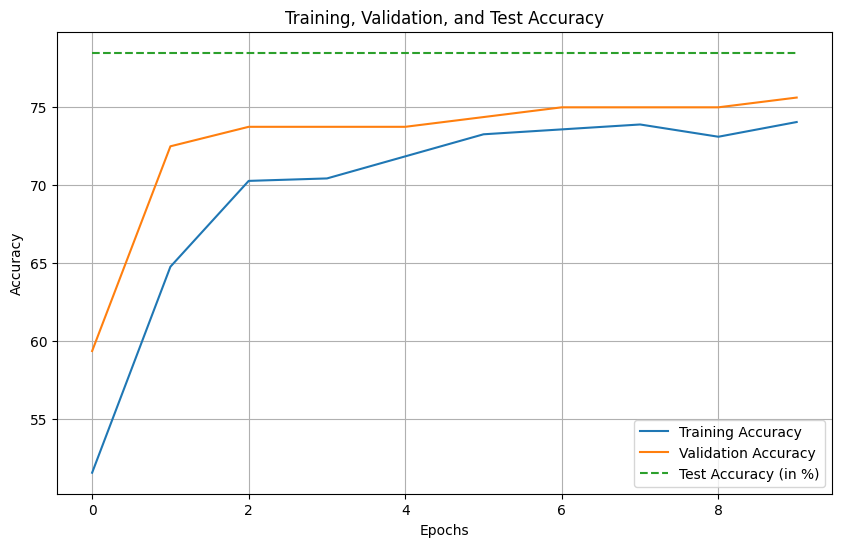

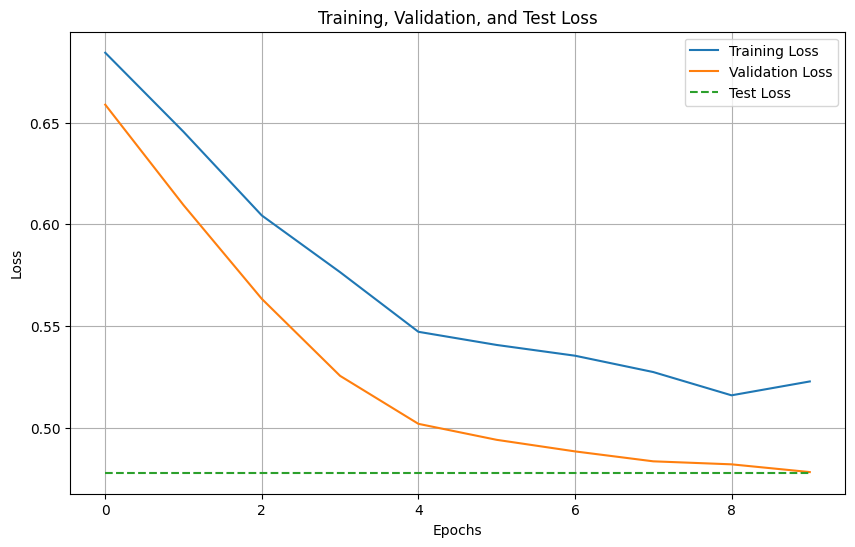

In [56]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accuracies_model_leaky_relu = [test_accuracy_model_leaky_relu] * epochs_n # 10 is our epoch count

plt.figure(figsize=(10, 6))
plt.plot(train_accuracies_model_leaky_relu, label='Training Accuracy')
plt.plot(valid_accuracies_model_leaky_relu, label='Validation Accuracy')
plt.plot(test_accuracies_model_leaky_relu, label='Test Accuracy (in %)', linestyle='--')

plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_model_leaky_relu, label='Training Loss')
plt.plot(valid_losses_model_leaky_relu, label='Validation Loss')

test_losses_model_leaky_relu = [avg_test_loss_model_leaky_relu] * epochs_n
plt.plot(test_losses_model_leaky_relu, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
#considering base model with dropout rate of 0.3,relu as activation function and 2 hidden layers
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class NeuralNetworkBase(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(NeuralNetworkBase, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
       
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.output(x)
        x = self.sigmoid(x)
        return x

def train_and_validate_BM(model, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n, batch_size): 
    # Prepare data tensors
    X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32).unsqueeze(1)
    X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
    y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    loss_func = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_tds = TensorDataset(X_train_tensor, y_train_tensor)
    valid_tds = TensorDataset(X_valid_tensor, y_valid_tensor)
    test_tds = TensorDataset(X_test_tensor, y_test_tensor)

    train_dl = DataLoader(train_tds, batch_size=batch_size, shuffle=True)
    valid_dl = DataLoader(valid_tds, batch_size=batch_size, shuffle=False)
    test_dl = DataLoader(test_tds, batch_size=batch_size, shuffle=False)

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(epochs_n):
        model.train()
        train_running_loss = 0.0
        correct_train = 0
        total_train = 0
        start_time = time.time()
        for train_inputs, train_labels in train_dl:
            train_inputs, train_labels = train_inputs.float(), train_labels.float()
            train_outputs = model(train_inputs)

            train_loss = loss_func(train_outputs, train_labels)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            train_running_loss += train_loss.item() * train_inputs.size(0)
            train_predics = torch.round(train_outputs)  # Predictions are of shape [batch_size, 1]
            correct_train += (train_predics == train_labels).sum().item()
            total_train += train_labels.size(0)

        epoch_train_loss = train_running_loss / len(train_dl.dataset)
        train_losses.append(epoch_train_loss)
        train_acc = (correct_train / total_train) * 100
        train_accuracies.append(train_acc)

        model.eval()
        valid_running_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for valid_inputs, valid_labels in valid_dl:
                valid_inputs, valid_labels = valid_inputs.float(), valid_labels.float()
                valid_outputs = model(valid_inputs)

                valid_loss = loss_func(valid_outputs, valid_labels)
                valid_running_loss += valid_loss.item() * valid_inputs.size(0)
                valid_predics = torch.round(valid_outputs)
                correct_valid += (valid_predics == valid_labels).sum().item()
                total_valid += valid_labels.size(0)

        epoch_valid_loss = valid_running_loss / len(valid_dl.dataset)
        valid_losses.append(epoch_valid_loss)
        valid_acc = (correct_valid / total_valid) * 100
        valid_accuracies.append(valid_acc)


        # Estimate the time taken for the epoch
        epoch_time = time.time() - start_time
        
         #Print epoch summary
        print(f"Epoch {epoch+1}/{epochs_n}, "
              f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {valid_acc:.4f}, "
              f"Time: {epoch_time:.4f}s")

        # Evaluate on test data
        model.eval()
        test_running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for test_inputs, test_labels in test_dl:
                test_inputs, test_labels = test_inputs.float(), test_labels.float()
                test_outputs = model(test_inputs)

                test_loss = loss_func(test_outputs, test_labels)
                test_running_loss += test_loss.item() * test_inputs.size(0)
                test_predics = torch.round(test_outputs)
                correct_test += (test_predics == test_labels).sum().item()
                total_test += test_labels.size(0)

        epoch_test_loss = test_running_loss / len(test_dl.dataset)
        test_acc = (correct_test / total_test) * 100

        print(f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {test_acc:.4f}")

    return train_losses, valid_losses, train_accuracies, valid_accuracies, test_acc,epoch_test_loss

# Usage
model_base = NeuralNetworkBase(dropout_rate=0.3)
train_losses_mb, valid_losses_mb, train_accs_mb, valid_accs_mb, test_accuracy_mb,avg_test_loss_mb = train_and_validate_BM(
    model_base, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n=20, batch_size=32
)


Epoch 1/20, Train Loss: 0.6711, Train Accuracy: 61.0063, Validation Loss: 0.6419, Validation Accuracy: 74.3750, Time: 0.0623s
Test Loss: 0.6424, Test Acc: 70.0000
Epoch 2/20, Train Loss: 0.6244, Train Accuracy: 72.0126, Validation Loss: 0.5853, Validation Accuracy: 75.0000, Time: 0.0485s
Test Loss: 0.5845, Test Acc: 73.0000
Epoch 3/20, Train Loss: 0.5797, Train Accuracy: 71.5409, Validation Loss: 0.5359, Validation Accuracy: 75.6250, Time: 0.0508s
Test Loss: 0.5312, Test Acc: 79.0000
Epoch 4/20, Train Loss: 0.5502, Train Accuracy: 73.4277, Validation Loss: 0.5038, Validation Accuracy: 75.0000, Time: 0.0313s
Test Loss: 0.5003, Test Acc: 77.5000
Epoch 5/20, Train Loss: 0.5424, Train Accuracy: 72.7987, Validation Loss: 0.4910, Validation Accuracy: 76.2500, Time: 0.0313s
Test Loss: 0.4867, Test Acc: 79.0000
Epoch 6/20, Train Loss: 0.5348, Train Accuracy: 74.3711, Validation Loss: 0.4861, Validation Accuracy: 75.0000, Time: 0.0535s
Test Loss: 0.4902, Test Acc: 76.0000
Epoch 7/20, Train Loss

In [58]:
class NeuralNetworkBatchNorm(nn.Module):
    def __init__(self, dropout_rate=0.3):
        super(NeuralNetworkBatchNorm, self).__init__()
        self.fc1 = nn.Linear(7, 64)
        self.batch_norm1 = nn.BatchNorm1d(64)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 64)
        self.batch_norm2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)
       
        self.output = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        
        x = self.output(x)
        x = self.sigmoid(x)
        return x
    
# Usage
model_bn = NeuralNetworkBatchNorm(dropout_rate=0.3)
train_losses_bn, valid_losses_bn, train_accs_bn, valid_accs_bn, test_accuracy_bn,avg_test_loss_bn = train_and_validate_BM(
    model_bn, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n=20, batch_size=32
)


Epoch 1/20, Train Loss: 0.6275, Train Accuracy: 67.1384, Validation Loss: 0.5883, Validation Accuracy: 73.7500, Time: 0.1545s
Test Loss: 0.5868, Test Acc: 75.0000
Epoch 2/20, Train Loss: 0.5760, Train Accuracy: 69.8113, Validation Loss: 0.5230, Validation Accuracy: 75.6250, Time: 0.0306s
Test Loss: 0.5242, Test Acc: 78.5000
Epoch 3/20, Train Loss: 0.5341, Train Accuracy: 73.1132, Validation Loss: 0.5038, Validation Accuracy: 75.6250, Time: 0.0478s
Test Loss: 0.5094, Test Acc: 78.5000
Epoch 4/20, Train Loss: 0.5315, Train Accuracy: 72.1698, Validation Loss: 0.4974, Validation Accuracy: 74.3750, Time: 0.0458s
Test Loss: 0.4967, Test Acc: 78.5000
Epoch 5/20, Train Loss: 0.5202, Train Accuracy: 74.6855, Validation Loss: 0.4923, Validation Accuracy: 73.7500, Time: 0.0539s
Test Loss: 0.4928, Test Acc: 78.5000
Epoch 6/20, Train Loss: 0.5392, Train Accuracy: 72.3270, Validation Loss: 0.4954, Validation Accuracy: 72.5000, Time: 0.0587s
Test Loss: 0.4913, Test Acc: 78.0000
Epoch 7/20, Train Loss

In [59]:
def train_and_validate_es(model, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n, batch_size, patience=3):
    # Prepare data tensors
    X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32).unsqueeze(1)
    X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
    y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    loss_func = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    train_tds = TensorDataset(X_train_tensor, y_train_tensor)
    valid_tds = TensorDataset(X_valid_tensor, y_valid_tensor)
    train_dl = DataLoader(train_tds, batch_size=batch_size, shuffle=True)
    valid_dl = DataLoader(valid_tds, batch_size=batch_size, shuffle=False)

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(epochs_n):
        model.train()
        train_running_loss = 0.0
        correct_train = 0
        total_train = 0
        start_time = time.time()
        for train_inputs, train_labels in train_dl:
            train_inputs, train_labels = train_inputs.float(), train_labels.float()
            train_outputs = model(train_inputs)

            # Calculate loss
            train_loss = loss_func(train_outputs, train_labels)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            train_running_loss += train_loss.item() * train_inputs.size(0)
            train_predics = torch.round(train_outputs)  # Predictions are of shape [batch_size, 1]
            correct_train += (train_predics == train_labels).sum().item()
            total_train += train_labels.size(0)

        epoch_train_loss = train_running_loss / len(train_dl.dataset)
        train_losses.append(epoch_train_loss)
        train_acc = (correct_train / total_train) * 100
        train_accuracies.append(train_acc)

        model.eval()
        valid_running_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for valid_inputs, valid_labels in valid_dl:
                valid_inputs, valid_labels = valid_inputs.float(), valid_labels.float()
                valid_outputs = model(valid_inputs)

                valid_loss = loss_func(valid_outputs, valid_labels)
                valid_running_loss += valid_loss.item() * valid_inputs.size(0)
                valid_predics = torch.round(valid_outputs)
                correct_valid += (valid_predics == valid_labels).sum().item()
                total_valid += valid_labels.size(0)

        epoch_valid_loss = valid_running_loss / len(valid_dl.dataset)
        valid_losses.append(epoch_valid_loss)
        valid_acc = (correct_valid / total_valid) * 100
        valid_accuracies.append(valid_acc)

        epoch_time = time.time() - start_time
        
         #Print epoch summary
        print(f"Epoch {epoch+1}/{epochs_n}, "
              f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {valid_acc:.4f}, "
              f"Time: {epoch_time:.4f}s")
        
        # Early stopping logic
        if epoch_valid_loss < best_val_loss:
            best_val_loss = epoch_valid_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1

        if early_stop_counter >= patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

        # Evaluate on test data
        model.eval()
        test_running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            test_dl = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)
            for test_inputs, test_labels in test_dl:
                test_inputs, test_labels = test_inputs.float(), test_labels.float()
                test_outputs = model(test_inputs)

                test_loss = loss_func(test_outputs, test_labels)
                test_running_loss += test_loss.item() * test_inputs.size(0)
                test_predics = torch.round(test_outputs)
                correct_test += (test_predics == test_labels).sum().item()
                total_test += test_labels.size(0)

        epoch_test_loss = test_running_loss / len(test_dl.dataset)
        test_acc = (correct_test / total_test) * 100

        print(f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {test_acc:.4f}")

    return train_losses, valid_losses, train_accuracies, valid_accuracies, test_acc,epoch_test_loss


# Usage
model_es = NeuralNetworkBase(dropout_rate=0.3)
train_losses_es, valid_losses_es, train_accs_es, valid_accs_es, test_accuracy_es,avg_test_loss_es = train_and_validate_es(
    model_es, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n=20, batch_size=32, patience=5
)


Epoch 1/20, Train Loss: 0.6705, Train Accuracy: 59.9057, Validation Loss: 0.6301, Validation Accuracy: 73.7500, Time: 0.1492s
Test Loss: 0.6301, Test Acc: 72.5000
Epoch 2/20, Train Loss: 0.6131, Train Accuracy: 70.1258, Validation Loss: 0.5712, Validation Accuracy: 75.0000, Time: 0.0397s
Test Loss: 0.5707, Test Acc: 74.5000
Epoch 3/20, Train Loss: 0.5848, Train Accuracy: 71.0692, Validation Loss: 0.5312, Validation Accuracy: 75.0000, Time: 0.0313s
Test Loss: 0.5340, Test Acc: 76.0000
Epoch 4/20, Train Loss: 0.5570, Train Accuracy: 71.0692, Validation Loss: 0.5101, Validation Accuracy: 76.8750, Time: 0.0469s
Test Loss: 0.5068, Test Acc: 77.0000
Epoch 5/20, Train Loss: 0.5392, Train Accuracy: 72.7987, Validation Loss: 0.4954, Validation Accuracy: 76.2500, Time: 0.0313s
Test Loss: 0.4955, Test Acc: 77.5000
Epoch 6/20, Train Loss: 0.5379, Train Accuracy: 72.4843, Validation Loss: 0.4899, Validation Accuracy: 76.2500, Time: 0.0447s
Test Loss: 0.4883, Test Acc: 78.5000
Epoch 7/20, Train Loss

In [57]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_and_validate_lr_scheduler(model, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n, batch_size):
    # Prepare data tensors
    X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32).unsqueeze(1)
    X_valid_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
    y_valid_tensor = torch.tensor(y_valid.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    loss_func = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Adjust parameters as needed

    train_tds = TensorDataset(X_train_tensor, y_train_tensor)
    valid_tds = TensorDataset(X_valid_tensor, y_valid_tensor)
    train_dl = DataLoader(train_tds, batch_size=batch_size, shuffle=True)
    valid_dl = DataLoader(valid_tds, batch_size=batch_size, shuffle=False)

    train_losses = []
    valid_losses = []
    train_accuracies = []
    valid_accuracies = []

    for epoch in range(epochs_n):
        model.train()
        train_running_loss = 0.0
        correct_train = 0
        total_train = 0
        start_time = time.time()
        for train_inputs, train_labels in train_dl:
            train_inputs, train_labels = train_inputs.float(), train_labels.float()
            train_outputs = model(train_inputs)

            # Calculate loss
            train_loss = loss_func(train_outputs, train_labels)

            optimizer.zero_grad()
            train_loss.backward()
            optimizer.step()

            train_running_loss += train_loss.item() * train_inputs.size(0)
            train_predics = torch.round(train_outputs)  # Predictions are of shape [batch_size, 1]
            correct_train += (train_predics == train_labels).sum().item()
            total_train += train_labels.size(0)

        epoch_train_loss = train_running_loss / len(train_dl.dataset)
        train_losses.append(epoch_train_loss)
        train_acc = (correct_train / total_train) * 100
        train_accuracies.append(train_acc)

        model.eval()
        valid_running_loss = 0.0
        correct_valid = 0
        total_valid = 0

        with torch.no_grad():
            for valid_inputs, valid_labels in valid_dl:
                valid_inputs, valid_labels = valid_inputs.float(), valid_labels.float()
                valid_outputs = model(valid_inputs)

                valid_loss = loss_func(valid_outputs, valid_labels)
                valid_running_loss += valid_loss.item() * valid_inputs.size(0)
                valid_predics = torch.round(valid_outputs)
                correct_valid += (valid_predics == valid_labels).sum().item()
                total_valid += valid_labels.size(0)

        epoch_valid_loss = valid_running_loss / len(valid_dl.dataset)
        valid_losses.append(epoch_valid_loss)
        valid_acc = (correct_valid / total_valid) * 100
        valid_accuracies.append(valid_acc)

        epoch_time = time.time() - start_time
        
         #Print epoch summary
        print(f"Epoch {epoch+1}/{epochs_n}, "
              f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {valid_acc:.4f}, "
              f"Time: {epoch_time:.4f}s")
        
        # Step the scheduler
        scheduler.step()

        # Evaluate on test data
        model.eval()
        test_running_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            test_dl = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)
            for test_inputs, test_labels in test_dl:
                test_inputs, test_labels = test_inputs.float(), test_labels.float()
                test_outputs = model(test_inputs)

                test_loss = loss_func(test_outputs, test_labels)
                test_running_loss += test_loss.item() * test_inputs.size(0)
                test_predics = torch.round(test_outputs)
                correct_test += (test_predics == test_labels).sum().item()
                total_test += test_labels.size(0)

        epoch_test_loss = test_running_loss / len(test_dl.dataset)
        test_acc = (correct_test / total_test) * 100

        print(f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {test_acc:.4f}")

    return train_losses, valid_losses, train_accuracies, valid_accuracies, test_acc,epoch_test_loss

# Usage
model_lr = NeuralNetworkBase(dropout_rate=0.3)
train_losses_lr, valid_losses_lr, train_accs_lr, valid_accs_lr, test_accuracy_lr,avg_test_loss_lr = train_and_validate_lr_scheduler(
    model_lr, X_train_final, y_train_final, X_valid, y_valid, X_test, y_test, epochs_n=20, batch_size=32
)


Epoch 1/20, Train Loss: 0.6529, Train Accuracy: 66.8239, Validation Loss: 0.6250, Validation Accuracy: 75.0000, Time: 0.2149s
Test Loss: 0.6261, Test Acc: 70.0000
Epoch 2/20, Train Loss: 0.6116, Train Accuracy: 72.1698, Validation Loss: 0.5715, Validation Accuracy: 76.2500, Time: 0.1094s
Test Loss: 0.5733, Test Acc: 76.5000
Epoch 3/20, Train Loss: 0.5739, Train Accuracy: 72.6415, Validation Loss: 0.5338, Validation Accuracy: 76.2500, Time: 0.0970s
Test Loss: 0.5350, Test Acc: 75.5000
Epoch 4/20, Train Loss: 0.5537, Train Accuracy: 70.7547, Validation Loss: 0.5111, Validation Accuracy: 75.6250, Time: 0.0938s
Test Loss: 0.5054, Test Acc: 79.5000
Epoch 5/20, Train Loss: 0.5424, Train Accuracy: 72.6415, Validation Loss: 0.4987, Validation Accuracy: 76.8750, Time: 0.0788s
Test Loss: 0.4935, Test Acc: 80.5000
Epoch 6/20, Train Loss: 0.5305, Train Accuracy: 73.2704, Validation Loss: 0.4978, Validation Accuracy: 76.8750, Time: 0.0689s
Test Loss: 0.4937, Test Acc: 80.0000
Epoch 7/20, Train Loss

In [58]:
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def train_and_validate_k_fold(model_class, X_train_final, y_train_final, X_test, y_test, epochs_n, batch_size, k=5):
    # Convert data to tensors
    X_train_tensor = torch.tensor(X_train_final.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train_final.values, dtype=torch.float32).unsqueeze(1)
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

    loss_func = nn.BCELoss()

    # Initialize arrays to store results across all folds
    fold_train_losses = []
    fold_valid_losses = []
    fold_train_accuracies = []
    fold_valid_accuracies = []

    # KFold setup
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)

    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train_tensor)):
        print(f'Fold {fold+1}/{k}')

        # Split the data into train and validation sets for this fold
        X_train_fold, y_train_fold = X_train_tensor[train_idx], y_train_tensor[train_idx]
        X_valid_fold, y_valid_fold = X_train_tensor[valid_idx], y_train_tensor[valid_idx]

        train_tds = TensorDataset(X_train_fold, y_train_fold)
        valid_tds = TensorDataset(X_valid_fold, y_valid_fold)
        train_dl = DataLoader(train_tds, batch_size=batch_size, shuffle=True)
        valid_dl = DataLoader(valid_tds, batch_size=batch_size, shuffle=False)

        # Initialize the model for this fold
        model = model_class()
        optimizer = optim.Adam(model.parameters(), lr=0.001)

        # Initialize metrics for each fold
        train_losses = []
        valid_losses = []
        train_accuracies = []
        valid_accuracies = []

        for epoch in range(epochs_n):
            model.train()
            train_running_loss = 0.0
            correct_train = 0
            total_train = 0
            start_time = time.time()
            for train_inputs, train_labels in train_dl:
                train_inputs, train_labels = train_inputs.float(), train_labels.float()
                train_outputs = model(train_inputs)

                train_loss = loss_func(train_outputs, train_labels)

                optimizer.zero_grad()
                train_loss.backward()
                optimizer.step()

                train_running_loss += train_loss.item() * train_inputs.size(0)
                train_predics = torch.round(train_outputs)
                correct_train += (train_predics == train_labels).sum().item()
                total_train += train_labels.size(0)

            epoch_train_loss = train_running_loss / len(train_dl.dataset)
            train_losses.append(epoch_train_loss)
            train_acc = (correct_train / total_train) * 100
            train_accuracies.append(train_acc)

            # Validation phase
            model.eval()
            valid_running_loss = 0.0
            correct_valid = 0
            total_valid = 0

            with torch.no_grad():
                for valid_inputs, valid_labels in valid_dl:
                    valid_inputs, valid_labels = valid_inputs.float(), valid_labels.float()
                    valid_outputs = model(valid_inputs)

                    valid_loss = loss_func(valid_outputs, valid_labels)
                    valid_running_loss += valid_loss.item() * valid_inputs.size(0)
                    valid_predics = torch.round(valid_outputs)
                    correct_valid += (valid_predics == valid_labels).sum().item()
                    total_valid += valid_labels.size(0)

            epoch_valid_loss = valid_running_loss / len(valid_dl.dataset)
            valid_losses.append(epoch_valid_loss)
            valid_acc = (correct_valid / total_valid) * 100
            valid_accuracies.append(valid_acc)
            #Print epoch summary
            print(f"Epoch {epoch+1}/{epochs_n}, "
              f"Train Loss: {epoch_train_loss:.4f}, Train Accuracy: {train_acc:.4f}, "
              f"Validation Loss: {epoch_valid_loss:.4f}, Validation Accuracy: {valid_acc:.4f}, "
              f"Time: {epoch_time:.4f}s")

           
        fold_train_losses.append(train_losses)
        fold_valid_losses.append(valid_losses)
        fold_train_accuracies.append(train_accuracies)
        fold_valid_accuracies.append(valid_accuracies)
    

     #Evaluate on test data after cross-validation
    model.eval()
    test_dl = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)

    test_running_loss = 0.0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for test_inputs, test_labels in test_dl:
            test_inputs, test_labels = test_inputs.float(), test_labels.float()
            test_outputs = model(test_inputs)

            test_loss = loss_func(test_outputs, test_labels)
            test_running_loss += test_loss.item() * test_inputs.size(0)
            test_predics = torch.round(test_outputs)
            correct_test += (test_predics == test_labels).sum().item()
            total_test += test_labels.size(0)

    epoch_test_loss = test_running_loss / len(test_dl.dataset)
    test_acc = (correct_test / total_test) * 100

    print(f"Test Loss: {epoch_test_loss:.4f}, Test Acc: {test_acc:.4f}")
    
    return fold_train_losses, fold_valid_losses, fold_train_accuracies, fold_valid_accuracies, test_acc,epoch_test_loss

# Usage
model_kfold = NeuralNetworkBase(dropout_rate=0.3)
train_losses_kfold, valid_losses_kfold, train_accs_kfold, valid_accs_kfold, test_accuracy_kfold,avg_test_loss_kfold = train_and_validate_k_fold(
    NeuralNetworkBase, X_train_final, y_train_final, X_test, y_test, epochs_n=20, batch_size=32, k=5
)

# Find the best fold based on validation accuracy
best_fold_idx = valid_accs_kfold.index(max(valid_accs_kfold))  # Get the fold with the best validation accuracy
best_train_acc_kfold = train_accs_kfold[best_fold_idx]
best_valid_acc_kfold = valid_accs_kfold[best_fold_idx]
best_train_losses_kfold = train_losses_kfold[best_fold_idx]
best_valid_losses_kfold = valid_losses_kfold[best_fold_idx]
best_test_accuracy_kfold = test_accuracy_kfold


Fold 1/5
Epoch 1/20, Train Loss: 0.6785, Train Accuracy: 59.6457, Validation Loss: 0.6697, Validation Accuracy: 60.1562, Time: 0.1161s
Epoch 2/20, Train Loss: 0.6458, Train Accuracy: 67.3228, Validation Loss: 0.6441, Validation Accuracy: 66.4062, Time: 0.1161s
Epoch 3/20, Train Loss: 0.6114, Train Accuracy: 70.2756, Validation Loss: 0.6216, Validation Accuracy: 66.4062, Time: 0.1161s
Epoch 4/20, Train Loss: 0.5716, Train Accuracy: 73.6220, Validation Loss: 0.6048, Validation Accuracy: 66.4062, Time: 0.1161s
Epoch 5/20, Train Loss: 0.5541, Train Accuracy: 71.8504, Validation Loss: 0.5999, Validation Accuracy: 65.6250, Time: 0.1161s
Epoch 6/20, Train Loss: 0.5322, Train Accuracy: 74.8031, Validation Loss: 0.5982, Validation Accuracy: 65.6250, Time: 0.1161s
Epoch 7/20, Train Loss: 0.5125, Train Accuracy: 75.3937, Validation Loss: 0.6021, Validation Accuracy: 66.4062, Time: 0.1161s
Epoch 8/20, Train Loss: 0.5043, Train Accuracy: 74.4094, Validation Loss: 0.6031, Validation Accuracy: 64.843

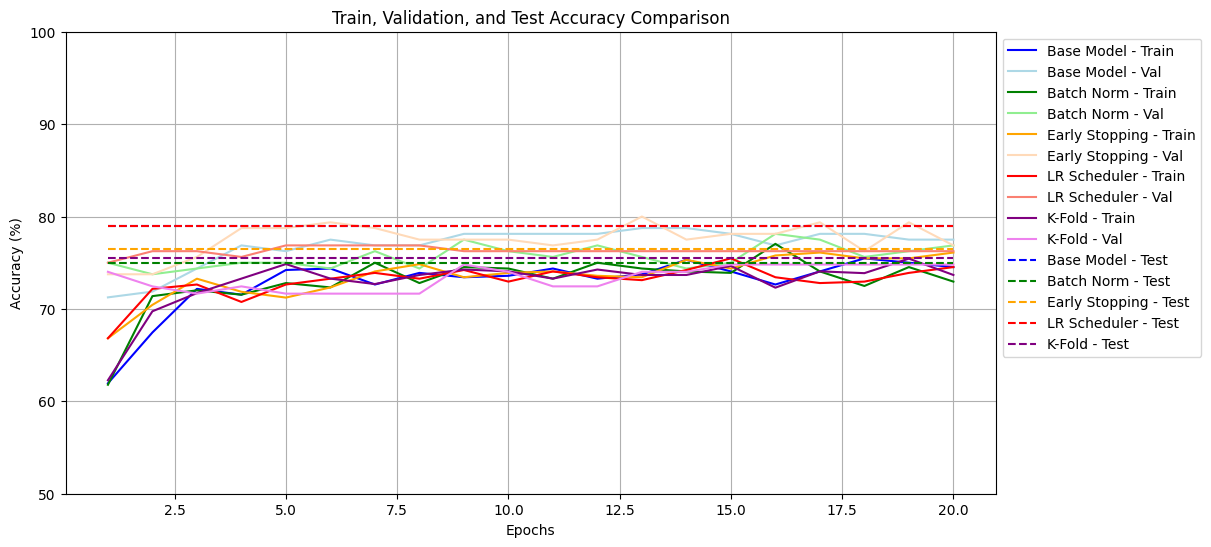

In [59]:
import matplotlib.pyplot as plt

# Get the minimum length of all accuracy lists to ensure they match in size
min_length = min(len(train_accs_mb), len(valid_accs_mb), len(train_accs_bn), len(valid_accs_bn), 
                 len(train_accs_es), len(valid_accs_es), len(train_accs_lr), len(valid_accs_lr), 
                 len(best_train_acc_kfold), len(best_valid_acc_kfold))

# Slice accuracy lists to the minimum length
train_accs_mb = train_accs_mb[:min_length]
valid_accs_mb = valid_accs_mb[:min_length]
train_accs_bn = train_accs_bn[:min_length]
valid_accs_bn = valid_accs_bn[:min_length]
train_accs_es = train_accs_es[:min_length]
valid_accs_es = valid_accs_es[:min_length]
train_accs_lr = train_accs_lr[:min_length]
valid_accs_lr = valid_accs_lr[:min_length]
best_train_acc_kfold = best_train_acc_kfold[:min_length]
best_valid_acc_kfold = best_valid_acc_kfold[:min_length]

epochs = range(1, min_length + 1)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plotting Train and Validation Accuracy for each method
plt.plot(epochs, train_accs_mb, label='Base Model - Train', color='blue')
plt.plot(epochs, valid_accs_mb, label='Base Model - Val', color='lightblue')

plt.plot(epochs, train_accs_bn, label='Batch Norm - Train', color='green')
plt.plot(epochs, valid_accs_bn, label='Batch Norm - Val', color='lightgreen')

plt.plot(epochs, train_accs_es, label='Early Stopping - Train', color='orange')
plt.plot(epochs, valid_accs_es, label='Early Stopping - Val', color='peachpuff')

plt.plot(epochs, train_accs_lr, label='LR Scheduler - Train', color='red')
plt.plot(epochs, valid_accs_lr, label='LR Scheduler - Val', color='salmon')

# Plot the best K-Fold train and validation accuracy
plt.plot(epochs, best_train_acc_kfold, label='K-Fold - Train', color='purple')
plt.plot(epochs, best_valid_acc_kfold, label='K-Fold - Val', color='violet')

# Plotting Test Accuracy Lines
plt.hlines(test_accuracy_mb, xmin=1, xmax=min_length, colors='blue', linestyles='--', label='Base Model - Test')
plt.hlines(test_accuracy_bn, xmin=1, xmax=min_length, colors='green', linestyles='--', label='Batch Norm - Test')
plt.hlines(test_accuracy_es, xmin=1, xmax=min_length, colors='orange', linestyles='--', label='Early Stopping - Test')
plt.hlines(test_accuracy_lr, xmin=1, xmax=min_length, colors='red', linestyles='--', label='LR Scheduler - Test')
plt.hlines(best_test_accuracy_kfold, xmin=1, xmax=min_length, colors='purple', linestyles='--', label='K-Fold - Test')

# Final Plot Configurations
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Train, Validation, and Test Accuracy Comparison')
plt.ylim(50, 100)  # Set y-axis limits to start from 50 for better visibility

# Adjusting legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.grid()
plt.show()


In [75]:
#Considering our base model along with Learning scheduler technique as our best model

In [76]:
#train_losses_lr, valid_losses_lr, train_accs_lr, valid_accs_lr, test_accuracy_lr

In [60]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

from sklearn.metrics import precision_recall_fscore_support
import torch

def evaluate_apcf(model, X_test, y_test,batch_size=32):
    # Convert test data to tensors
    X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
    
    # Create DataLoader for the test set
    test_dl = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=batch_size, shuffle=False)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    # Set the model to evaluation mode
    model.eval()  
    correct_test = 0  # Initialize to count correct predictions
    total_test = 0  # Initialize to count total examples
    total_test_loss = 0.0  # Initialize total test loss
    test_predictions = []  # Store predicted values
    all_labels = []  # Store true labels

    # Disable gradient computation for evaluation
    with torch.no_grad():  
        for test_inputs, test_labels in test_dl:
            test_inputs, test_labels = test_inputs.float(), test_labels.float().squeeze()  # Ensure correct data type and shape
            
            # Forward pass
            test_outputs = model(test_inputs)
            test_outputs = torch.squeeze(test_outputs)  # Squeeze the output to match the shape of labels
            
            # Calculate the loss
            test_loss = loss_func(test_outputs, test_labels)
            total_test_loss += test_loss.item() * test_inputs.size(0)  # Accumulate total test loss
            
            # Calculate test accuracy
            test_predics = torch.round(test_outputs)  # Round sigmoid outputs to 0 or 1
            correct_test += (test_predics== test_labels).sum().item()  # Counting correct predictions
            total_test += test_labels.size(0)  # Count total test examples

            # Store all predictions and true labels for measuring precision, recall, F1
            test_predictions.extend(test_predics.cpu().numpy())  # Collect predictions
            all_labels.extend(test_labels.cpu().numpy())  # Collect true labels

    # Calculate the test accuracy 
    test_accuracy = (correct_test/ total_test) * 100
    print(f"Test Accuracy: {test_accuracy:.4f}%")

    # Calculate precision, recall, and F1 score using sklearn
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, test_predictions, average='binary')

    # Print precision, recall, and F1 score
    print(f"Precision: {precision * 100:.4f}%")
    print(f"Recall: {recall * 100:.4f}%")
    print(f"F1 Score: {f1 * 100:.4f}%")

    #return test_accuracy, precision_lr, recall_lr, f1_lr
    return all_labels,test_predictions
all_labels_lr,test_predictions_lr=evaluate_apcf(model_lr, X_test, y_test,batch_size=32)

Test Accuracy: 79.0000%
Precision: 76.4706%
Recall: 81.2500%
F1 Score: 78.7879%


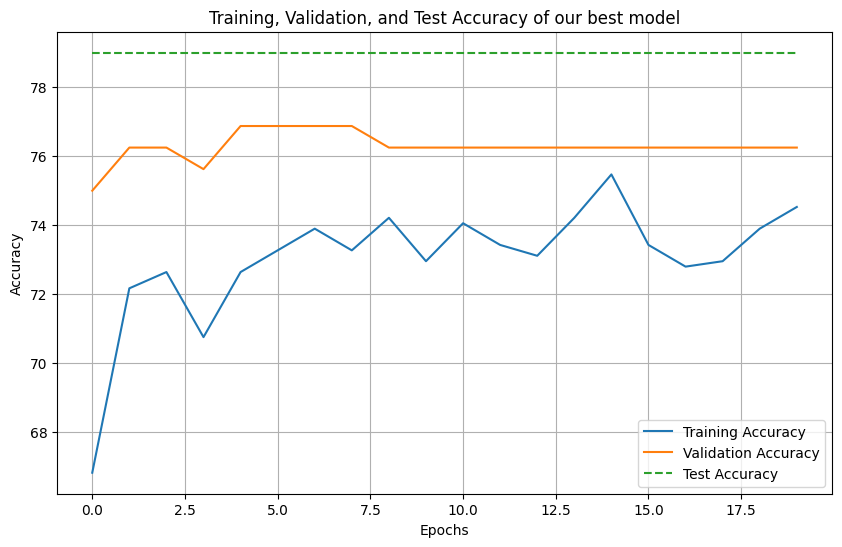

In [61]:
# Plot the training, validation, and test accuracies across the consider number of epochs
test_accs_lr = [test_accuracy_lr] * 20 # Repeat test accuracy

plt.figure(figsize=(10, 6))
plt.plot(train_accs_lr, label='Training Accuracy')
plt.plot(valid_accs_lr, label='Validation Accuracy')
plt.plot(test_accs_lr, label='Test Accuracy', linestyle='--')

plt.title('Training, Validation, and Test Accuracy of our best model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


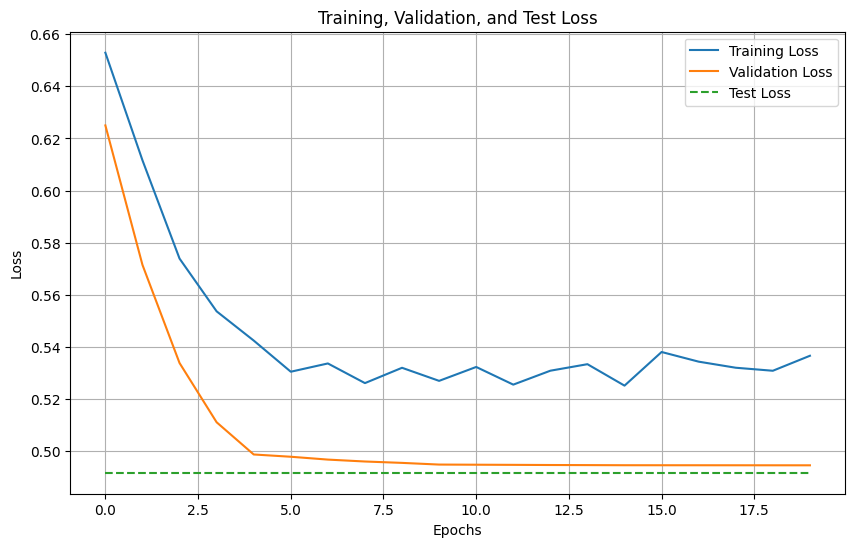

In [62]:
# Plot the training, validation, and test loss across the considered number of epochs
plt.figure(figsize=(10, 6))
plt.plot(train_losses_lr, label='Training Loss')
plt.plot(valid_losses_lr, label='Validation Loss')

test_losses_lr = [avg_test_loss_lr] * 20 #20 is our considered number of epochs
plt.plot(test_losses_lr, label='Test Loss', linestyle='--')

plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Confusion Matrix:


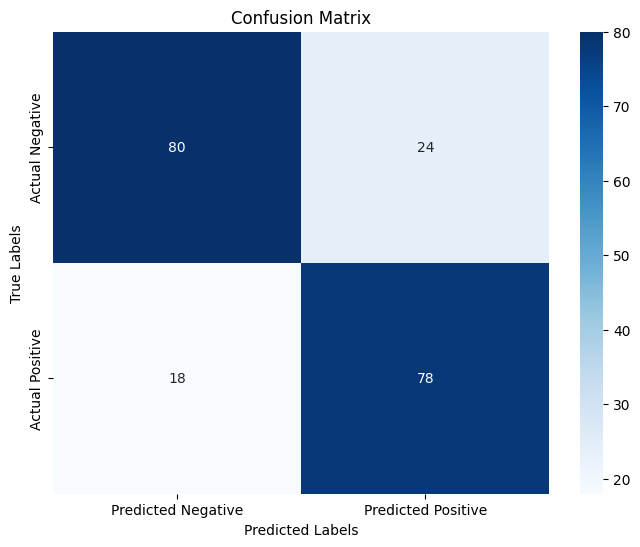

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# confusion matrix
cmx_lr= confusion_matrix(all_labels_lr, test_predictions_lr)
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(cmx_lr, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


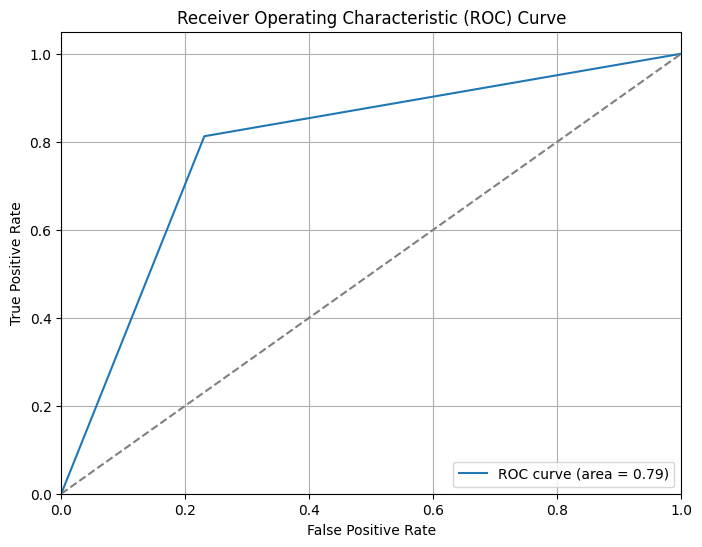

In [64]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr_lr, tpr_lr, _ = roc_curve(all_labels_lr,test_predictions_lr)  # Use raw outputs before rounding for ROC
roc_auc_lr = auc(fpr_lr, tpr_lr)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [69]:
torch.save(model_lr.state_dict(), 'best_model_lr_weights_p2.pth')